## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Для составления аналитического обзора по проблеме безработицы в России необходимо провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

## <b>Задание:</b>

### <a class="anchor" id="1"></a> Загрузка данных. Предобработка

1. Загрузите файл <code>unemployed.csv</code> с разделителем <code>;</code>
2. Определите размер датасета.
3. Познакомьтесь с данными.
4. Проверьте пропуски, дубликаты и типы данных.
5. Добавьте столбцы с месяцем и годом (year, month).
6. Сформулируйте выводы.

###  <a class="anchor" id="1"></a> Исследовательский анализ данных

Все отчеты в этом разделе должны быть визуализированы. Графики должны содержать названия и подписи осей. Каждый пункт сопровидите выводами.

1. Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.
2. Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.<br> *2.1 Детализируйте по каждому году, визуализируйте результат.
3. Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.
4. Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.<br>
*4.1 Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.<br>
5. Осуществите категоризацию по столбцам <code>gender</code> и <code>education</code> в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования.<br>
6. Исследуйте безработицу в России отдельно за 2020 год (за исключением декабря 2020!). Создайте срез данных.<br>
6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.<br>
6.2 Определите процент трудоустройства по гендерной принадлежности<br>
6.3 Определите число обращений в службу занятости по федеральным округам.<br>
6.4 Определите разброс числа объявлений по регионам с помощью boxplot.<br>
6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.<br>
***6.6 Определите процент трудоустройства по федеральным округам.<br>
***6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле<br>

Задания, отмеченные символом * - для получения максимального балла по работе, рекомендуется для профиля "Математическое моделирование и анализ данных в экономике".



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Установили тему оформления графиков и их размер
sns.set_theme(style="darkgrid", font_scale=1.2) 
plt.rcParams['figure.figsize'] = (10, 6)

### <a class="anchor" id="1"></a> Загрузка данных. Предобработка

1. Загрузите файл <code>unemployed.csv</code> с разделителем <code>;</code>

In [3]:
df = pd.read_csv('unemployed.csv', sep=';')

C:\Users\User\AppData\Local\Temp\ipykernel_15964\1369789560.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('unemployed.csv', sep=';')


In [4]:
df.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2


2. Определите размер датасета.

In [5]:
df.shape

(4347416, 12)

В датасете 4347416 строк и 12 столбцов.

3. Познакомьтесь с данными.

In [6]:
pd.options.display.max_info_rows # макс. кол-во строк, по которым в info по умолчанию выводится информация о ненулевых значениях

1690785

In [7]:
# в данном датафрейме строк больше, чем 1690785, но с помощью show_counts=True мы всё равно можем их вывести на экран
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   id                 4347416 non-null  int64 
 1   district           4347416 non-null  object
 2   region             4347416 non-null  object
 3   month_application  4347416 non-null  object
 4   changed_value      4347416 non-null  bool  
 5   age                4347416 non-null  object
 6   gender             4347416 non-null  object
 7   education          4347416 non-null  object
 8   hc_repeat          4347416 non-null  bool  
 9   hc_didnotwork      4347416 non-null  bool  
 10  find_new_job       4347416 non-null  bool  
 11  count              4347416 non-null  int64 
dtypes: bool(4), int64(2), object(6)
memory usage: 281.9+ MB


4. Проверьте пропуски, дубликаты и типы данных.

Кажется, что пропусков нет, однако посмотрим подробнее.

Выведем через цикл уникальные значения каждого столбца:

In [8]:
for element in df.columns.tolist():
    print(element)
    print(df[element].unique())
    print('\n')

id
[   1170     256     711 ... 4347212 4347025 4347338]


district
['Дальневосточный федеральный округ' 'Приволжский федеральный округ'
 'Северо-Западный федеральный округ' 'Северо-Кавказский федеральный округ'
 'Сибирский федеральный округ' 'Уральский федеральный округ'
 'Центральный федеральный округ' 'Южный федеральный округ']


region
['Амурская область' 'Еврейская автономная область' 'Забайкальский край'
 'Камчатский край' 'Магаданская область' 'Приморский край'
 'Республика Бурятия' 'Республика Саха (Якутия)' 'Сахалинская область'
 'Хабаровский край' 'Чукотский автономный округ' 'Кировская область'
 'Нижегородская область' 'Оренбургская область' 'Пензенская область'
 'Пермский край' 'Республика Башкортостан' 'Республика Марий Эл'
 'Республика Мордовия' 'Республика Татарстан (Татарстан)'
 'Самарская область' 'Саратовская область' 'Удмуртская Республика'
 'Ульяновская область' 'Чувашская Республика - Чувашия'
 'Архангельская область' 'Вологодская область' 'г. Санкт-Петербург'
 'Ка

Оказывается, что в столбцах <code>gender</code> и <code>education</code> представлены данные смешанного типа (некоторые числа в записаны с корректным типом <code>int</code>, а некоторые с типом <code>str</code> (в pandas это - <code>object</code>)).<br>
Более того, есть в данных столбцах значение <code>'None'</code>, однако оно записано не как тип <code>NoneType</code>, а тоже как <code>str</code>. Поэтому эти пропуски не отображались выше через df.info(show_counts=True).

In [9]:
# Смотрим, сколько пропусков 'None' в столбце 'gender'
df[df['gender']=='None']['id'].count()

8

In [10]:
# Смотрим, сколько пропусков 'None' в столбце 'education'
df[df['education']=='None']['id'].count()

339215

Число строк в датасете со значением <code>'None'</code> в столбце <code>gender</code> очень мало относительно всего датасета, поэтому эти строки можно просто удалить, перезаписав датасет:

In [11]:
df = df[df['gender']!='None']

In [12]:
df.shape

(4347408, 12)

Число строк в датасете с значением <code>'None'</code> в столбце <code>education</code> уже значительное. Заменим <code>'None'</code> в этом столбце на 0 - нет данных:

In [13]:
df.loc[df['education'] == 'None', 'education'] = 0
# или так: df['education'] = df['education'].replace('None', 0)

In [14]:
# Проверяем
df[df['gender']=='None']['id'].count()

0

In [15]:
# Проверяем
df[df['education']=='None']['id'].count()

0

Теперь надо привести все значения в этих столбцах (<code>gender</code> и <code>education</code>) к типу <code>int</code>:

In [16]:
df['gender'] = df['gender'].astype('int')
df['education'] = df['education'].astype('int')

In [17]:
# Проверяем. Теперь всё верно
print(df['gender'].unique())
print(df['education'].unique())

[0 1]
[4 2 1 3 6 9 0]


In [18]:
# Дубликатов нет
df.duplicated().sum()

0

In [19]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4347408 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   id                 4347408 non-null  int64 
 1   district           4347408 non-null  object
 2   region             4347408 non-null  object
 3   month_application  4347408 non-null  object
 4   changed_value      4347408 non-null  bool  
 5   age                4347408 non-null  object
 6   gender             4347408 non-null  int32 
 7   education          4347408 non-null  int32 
 8   hc_repeat          4347408 non-null  bool  
 9   hc_didnotwork      4347408 non-null  bool  
 10  find_new_job       4347408 non-null  bool  
 11  count              4347408 non-null  int64 
dtypes: bool(4), int32(2), int64(2), object(4)
memory usage: 281.9+ MB


In [20]:
# Преобразуем тип данных столбца 'month_application' к datetime64[ns]
df['month_application'] = pd.to_datetime(df['month_application'], format='%Y-%m')

In [21]:
# Теперь в столбце 'month_application' указан верный тип datetime64[ns]
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4347408 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 4347408 non-null  int64         
 1   district           4347408 non-null  object        
 2   region             4347408 non-null  object        
 3   month_application  4347408 non-null  datetime64[ns]
 4   changed_value      4347408 non-null  bool          
 5   age                4347408 non-null  object        
 6   gender             4347408 non-null  int32         
 7   education          4347408 non-null  int32         
 8   hc_repeat          4347408 non-null  bool          
 9   hc_didnotwork      4347408 non-null  bool          
 10  find_new_job       4347408 non-null  bool          
 11  count              4347408 non-null  int64         
dtypes: bool(4), datetime64[ns](1), int32(2), int64(2), object(3)
memory usage: 281.9+ MB

5. Добавьте столбцы с месяцем и годом (year, month).

In [22]:
# Добавим столбцы с месяцем и годом
df['month'] = df['month_application'].dt.month
df['year'] = df['month_application'].dt.year

In [23]:
df

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month,year
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,52-57,0,4,True,False,False,1,1,2017
1,256,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,22-27,1,4,True,False,False,1,1,2017
2,711,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,34-39,1,4,True,False,True,1,1,2017
3,799,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,0,4,False,False,False,1,1,2017
4,861,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,1,2,True,False,False,2,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347411,4346979,Южный федеральный округ,Ростовская область,2020-12-01,False,28-33,0,0,False,False,False,3,12,2020
4347412,4346817,Южный федеральный округ,Ростовская область,2020-12-01,False,16-21,0,0,False,False,False,2,12,2020
4347413,4347212,Южный федеральный округ,Ростовская область,2020-12-01,False,40-45,1,0,False,False,False,5,12,2020
4347414,4347025,Южный федеральный округ,Ростовская область,2020-12-01,False,28-33,1,0,False,False,False,4,12,2020


6. Сформулируйте выводы.

<b>Вывод
<div class="alert alert-block alert-success">
    
1. В датасете (после предобработки) 4347408 строк и 14 столбцов.
2. В столбцах <code>gender</code> и <code>education</code> были представлены данные смешанного типа (некоторые числа в записаны с корректным типом <code>int</code>, а некоторые с типом <code>str</code> (в pandas это - <code>object</code>)).<br>
Более того, в данных столбцах было значение <code>'None'</code>, однако оно было записано не как тип <code>NoneType</code>, а тоже как <code>str</code>.
3. Строки (их было 8) со значением <code>'None'</code> в столбце <code>gender</code> были удалены, так как их слишком мало и их отсутствие никак не отразится на результатах исследования.
4. Строки (их было 339215) со значением <code>'None'</code> в столбце <code>education</code> удалить было нельзя, так как их достаточно много, их удаление могло бы исказить результаты исследования. Значения <code>'None'</code> в столбце <code>education</code> были заменены на 0 - нет данных.
5. Все значения в столбцах <code>gender</code> и <code>education</code> были приведены к корректному типу <code>int</code>.
6. Дубликаты обнаружены не были.
7. Тип данных столбца <code>month_application</code> был приведён к типу <code>datetime64[ns]</code>.
8. Были добавлены столбцы с месяцем и годом: <code>month</code> и <code>year</code>.

###  <a class="anchor" id="1"></a> Исследовательский анализ данных

1. Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.

In [24]:
# Создаём сводную таблицу количества обращений в службу занятости по месяцам
applications_in_month = df.pivot_table(index='month_application', # индексы - месяц
                                         aggfunc='sum', # агрегирующая функция - суммирование
                                         values='count') # значения, которые суммируем - значения в столбце 'count' (количество обращений)
applications_in_month = applications_in_month.reset_index() # перезаписали индексы
applications_in_month

,month_application,count
0,2017-01-01,155746
1,2017-02-01,146347
2,2017-03-01,156272
3,2017-04-01,138043
4,2017-05-01,148049
5,2017-06-01,118358
6,2017-07-01,119418
7,2017-08-01,117018
8,2017-09-01,120229
9,2017-10-01,139510


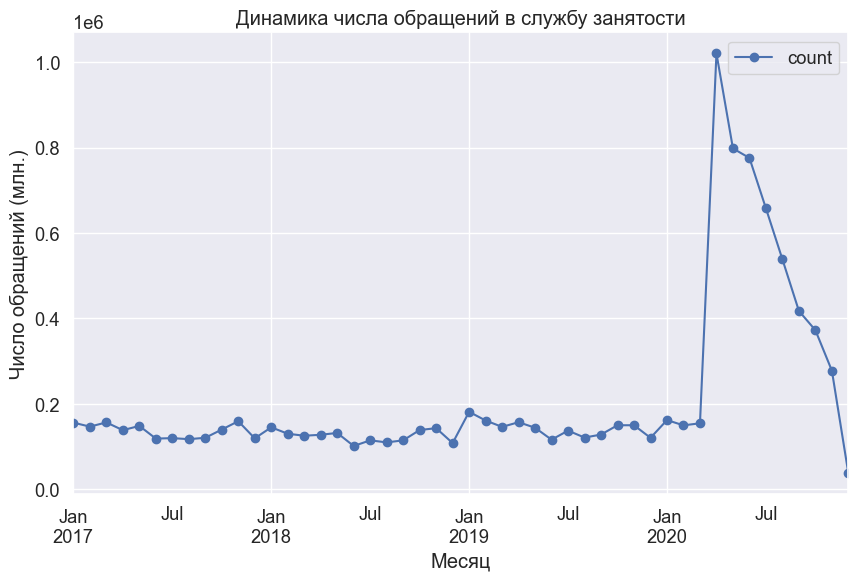

In [25]:
# Создаём линейный график динамикики числа обращений в службу занятости по месяцам
applications_in_month.plot(x='month_application',
       y='count',
       style='o-',
       grid=True,
       figsize=(10,6),
       title='Динамика числа обращений в службу занятости',
       xlabel='Месяц',
       ylabel='Число обращений (млн.)')
plt.show()
# Прим.: по оси y значения указаны в миллионах

In [26]:
# Укрупняем по годам: создаём сводную таблицу количества обращений в службу занятости по годам
applications_in_year = df.pivot_table(index='year',
                                         aggfunc='sum',
                                         values='count')
applications_in_year = applications_in_year.reset_index()
applications_in_year

,year,count
0,2017,1636951
1,2018,1486266
2,2019,1708623
3,2020,5358366


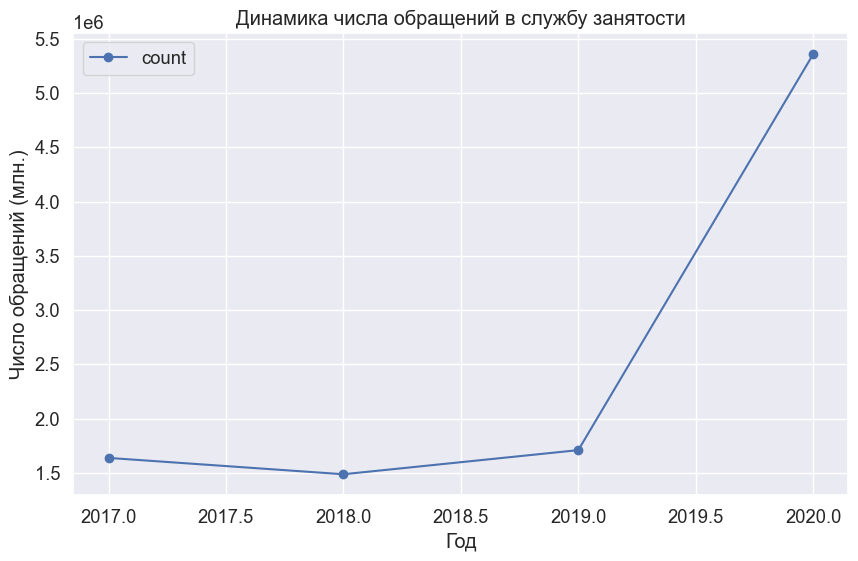

In [27]:
# Создаём линейный график динамикики числа обращений в службу занятости по годам
applications_in_year.plot(x='year',
       y='count',
       style='o-',
       grid=True,
       figsize=(10,6),
       title='Динамика числа обращений в службу занятости',
       xlabel='Год',
       ylabel='Число обращений (млн.)')
plt.show()

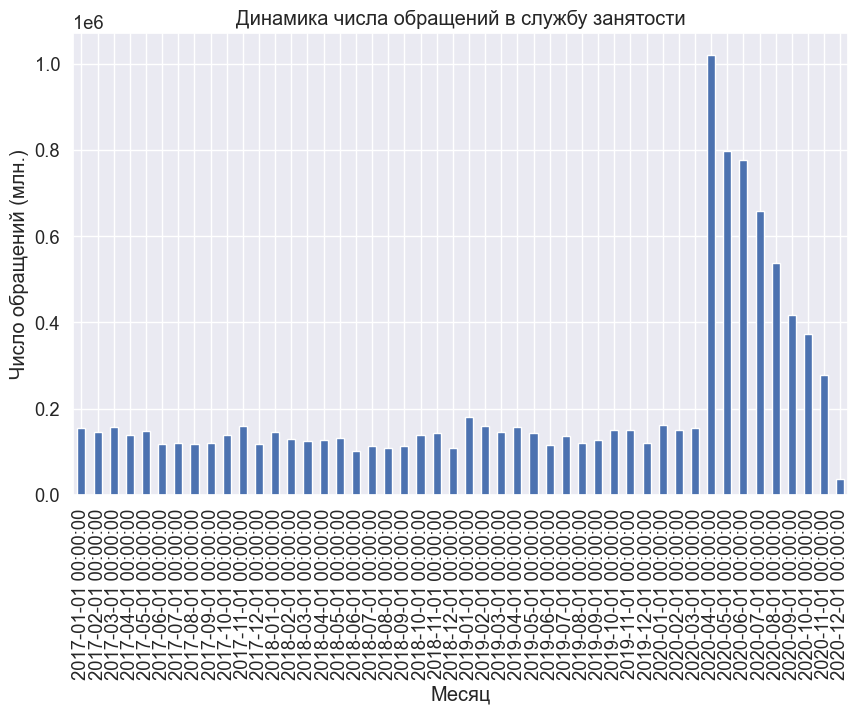

In [28]:
# Создаём столбчатую диаграмму числа обращений в службу занятости по месяцам
applications_in_month.plot(kind='bar',
                              x='month_application',
                              y='count',
                              title='Динамика числа обращений в службу занятости',
                              xlabel='Месяц',
                              ylabel='Число обращений (млн.)',
                              legend=False)
plt.show()

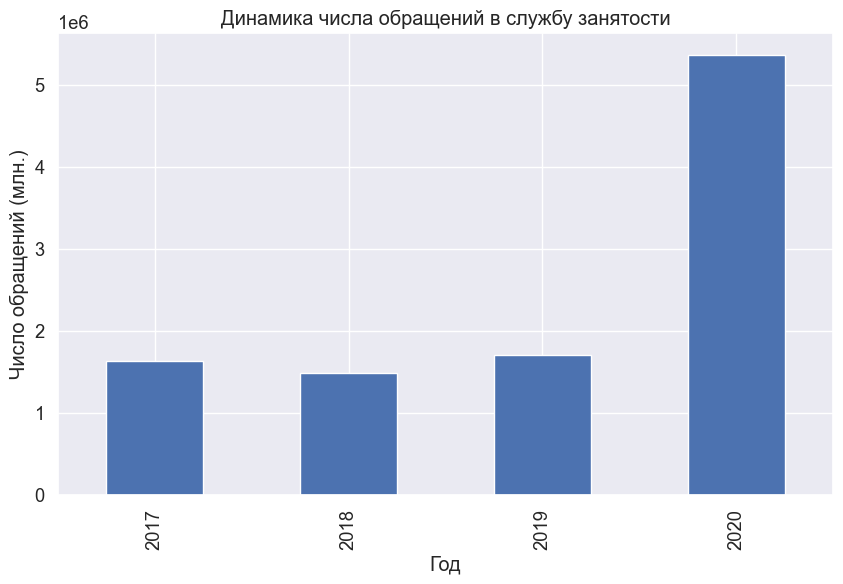

In [29]:
# Создаём столбчатую диаграмму числа обращений в службу занятости по годам
applications_in_year.plot(kind='bar',
                              x='year',
                              y='count',
                              title='Динамика числа обращений в службу занятости',
                              xlabel='Год',
                              ylabel='Число обращений (млн.)',
                              legend=False)
plt.show()

In [30]:
applications_in_month_repeat = df.pivot_table(index='month_application',
                                       columns='hc_repeat', # Детализируем: добавляем признак повторных обращений в центры занятости населения
                                       aggfunc='sum',
                                       values='count')
applications_in_month_repeat = applications_in_month_repeat.reset_index()
applications_in_month_repeat.columns = ['month_application', 'first_applications', 'repeated_applications'] # переименовываем столбцы
applications_in_month_repeat

,month_application,first_applications,repeated_applications
0,2017-01-01,74646,81100
1,2017-02-01,72033,74314
2,2017-03-01,75468,80804
3,2017-04-01,66810,71233
4,2017-05-01,62068,85981
5,2017-06-01,55729,62629
6,2017-07-01,60592,58826
7,2017-08-01,56994,60024
8,2017-09-01,59381,60848
9,2017-10-01,65143,74367


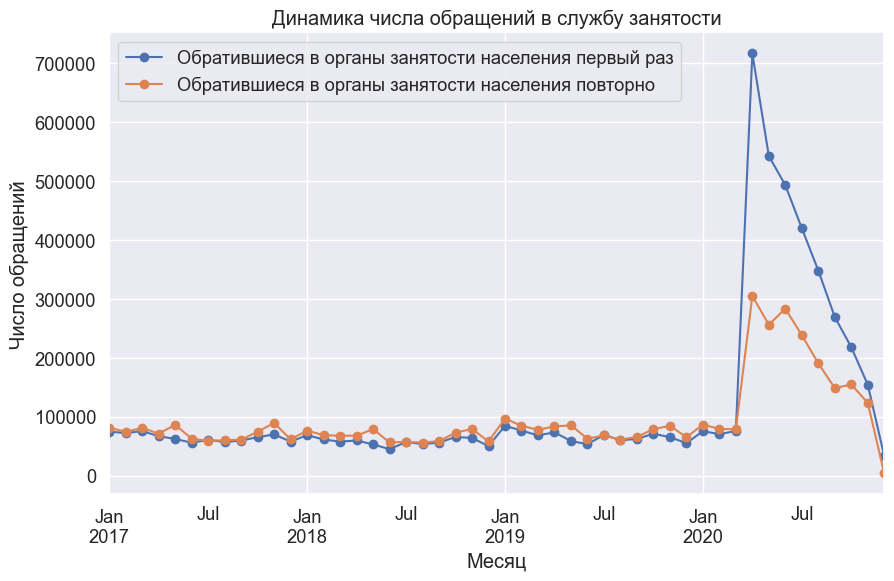

In [31]:
# Создаём линейный график динамикики числа обращений в службу занятости по месяцам с признаком повторных обращений 
applications_in_month_repeat.plot(x='month_application',
       y=['first_applications', 'repeated_applications'],
       style='o-',
       grid=True,
       figsize=(10,6),
       title='Динамика числа обращений в службу занятости',
       xlabel='Месяц',
       ylabel='Число обращений',
       label=['Обратившиеся в органы занятости населения первый раз', 'Обратившиеся в органы занятости населения повторно'])
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
В апреле 2020 года был резкий скачок числа обращений в службу занятости: 1020329 обращений, что почти в 7 раз превышает аналогичный показатель в предыдущие месяцы. Это связано с пандемией коронавируса, локдауном, закрытием предприятий и, как следствие, потерей работы среди населения. При детализации стало понятно, что в 2020 году основной всплеск обращений произошёл из-за обращения в органы занятости населением в первый раз. При этом в 2020 году также выросло число обращавшихся повторно.

2. Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.<br> *2.1 Детализируйте по каждому году, визуализируйте результат.

In [32]:
# Создаём сводную таблицу числа обращений в службу занятости по возрастным группам
applications_by_age = df.pivot_table(index='age',
                                         aggfunc='sum',
                                         values='count')
applications_by_age = applications_by_age.reset_index()
applications_by_age

,age,count
0,16-21,642895
1,22-27,1314197
2,28-33,2001622
3,34-39,1963617
4,40-45,1580491
5,46-51,1325802
6,52-57,1066379
7,58-60,295203


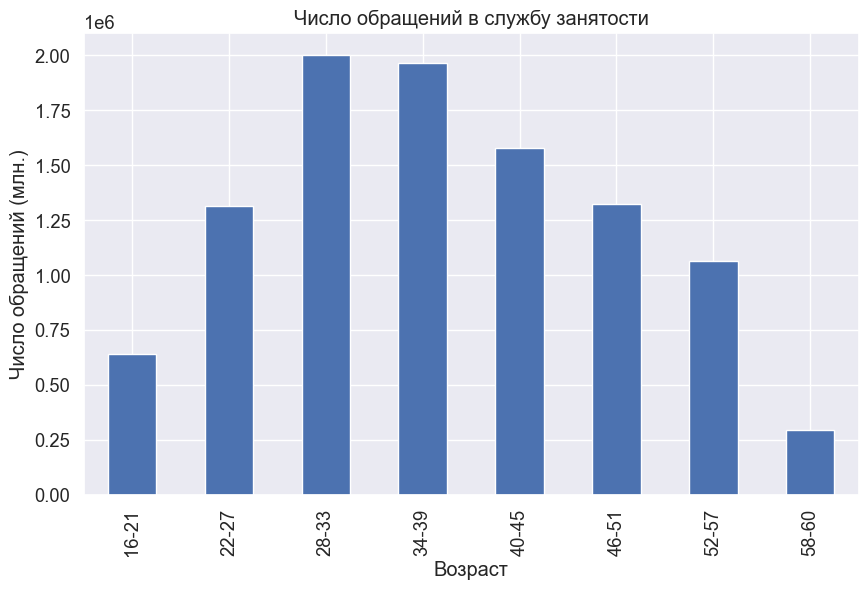

In [33]:
# Создаём столбчатую диаграмму
applications_by_age.plot(kind='bar',
                              x='age',
                              y='count',
                              title='Число обращений в службу занятости',
                              xlabel='Возраст',
                              ylabel='Число обращений (млн.)',
                              legend=False)
plt.show()

In [34]:
applications_by_age_year = df.pivot_table(index=['age', 'year'], # Детализируем по каждому году
                                     aggfunc='sum',
                                     values='count')
applications_by_age_year = applications_by_age_year.reset_index()
applications_by_age_year

,age,year,count
0,16-21,2017,122823
1,16-21,2018,101361
2,16-21,2019,100517
3,16-21,2020,318194
4,22-27,2017,202814
5,22-27,2018,159944
6,22-27,2019,170986
7,22-27,2020,780453
8,28-33,2017,276401
9,28-33,2018,245414


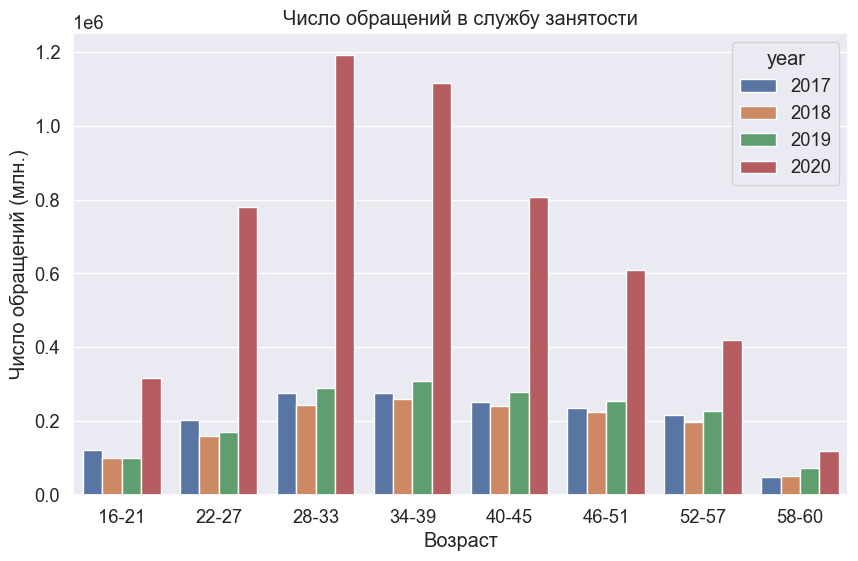

In [35]:
# Создаём столбчатую диаграмму числа обращений в службу занятости по возрасту с детализацией по году с помощью библиотеки Seaborn
sns.barplot(data=applications_by_age_year, x='age', y='count', hue='year').set(title='Число обращений в службу занятости',
                                                                              xlabel='Возраст',
                                                                              ylabel='Число обращений (млн.)')
plt.show()
# т.к. каждая запись в данной сводной таблице уникальная, то sns.barplot показывает по сути среднее для каждой уникальной записи, а это и есть просто значение этой уникальной записи
# прим.: поэтому, естественно, доверительный интервал здесь не показывается

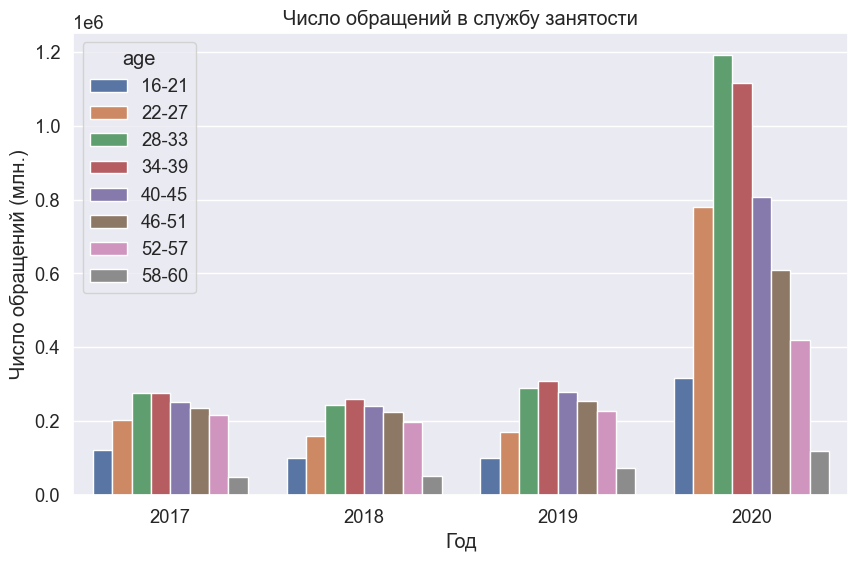

In [36]:
# Можно посмотреть и наоборот: по годам с детализацией по возрасту
sns.barplot(data=applications_by_age_year, x='year', y='count', hue='age').set(title='Число обращений в службу занятости',
                                                                              xlabel='Год',
                                                                              ylabel='Число обращений (млн.)')
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
Из полученных результатов видно, что чаще всего в службу занятости обращаются люди в возрасте 28-33 лет. Следом за ними идут люди в возрасте 34-39 лет. Это связано с тем, что люди в данных возрастных категориях чаще всего уже закончили получать образование и либо не имеют вовсе трудового стажа, либо имеют очень небольшой трудовой стаж, в то время как работодатели склонны отдавать предпочтение наиболее опытным работникам.

3. Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.

In [37]:
print('Общее число устроившихся на работу граждан:', df[df['find_new_job'] == True]['count'].sum())

Общее число устроившихся на работу граждан: 3576667


In [38]:
employment = df[df['find_new_job'] == True]['count'].sum() / df['count'].sum()

In [39]:
print(f'Процент трудоустройства по всему датасету: {employment:.2%}')

Процент трудоустройства по всему датасету: 35.10%


In [40]:
# Создаём сводную таблицу по трудоустройству граждан
employed_unemployed = df.pivot_table(index='find_new_job',
                                     aggfunc='sum',
                                     values='count')
employed_unemployed = employed_unemployed.reset_index()
employed_unemployed

,find_new_job,count
0,False,6613539
1,True,3576667


In [41]:
# Заменяем в сводной таблице значение False на 'Нетрудоустроившиеся'
employed_unemployed['find_new_job'] = employed_unemployed['find_new_job'].replace(False, 'Нетрудоустроившиеся')
# Заменяем в сводной таблице значение True на 'Трудоустроившиеся'
employed_unemployed['find_new_job'] = employed_unemployed['find_new_job'].replace(True, 'Трудоустроившиеся')

In [42]:
employed_unemployed

,find_new_job,count
0,Нетрудоустроившиеся,6613539
1,Трудоустроившиеся,3576667


In [43]:
# Добавим столбец с процентным соотношением между трудоустроившимися и нетрудоустроившимися
employed_unemployed['perc'] = (employed_unemployed['count'] / employed_unemployed['count'].sum() * 100).round(2)

In [44]:
employed_unemployed

,find_new_job,count,perc
0,Нетрудоустроившиеся,6613539,64.9
1,Трудоустроившиеся,3576667,35.1


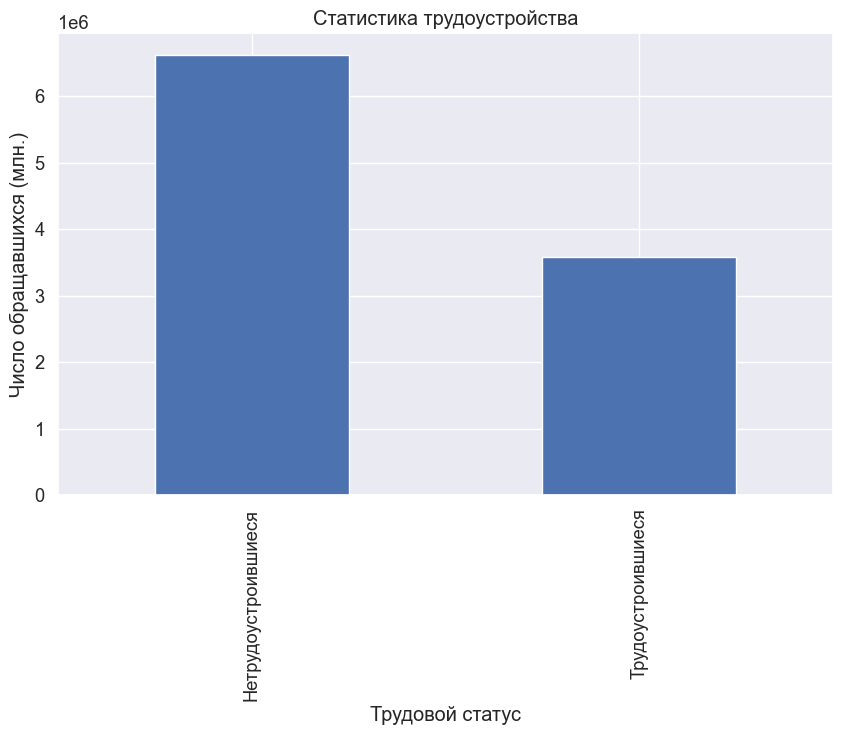

In [45]:
# Создаём столбчатую диаграмму по трудоустройству граждан (в абсолютных значениях)
employed_unemployed.plot(kind='bar',
                              x='find_new_job',
                              y='count',
                              title='Статистика трудоустройства',
                              xlabel='Трудовой статус',
                              ylabel='Число обращавшихся (млн.)',
                              legend=False)
plt.show()
# Прим.: 'Число обращавшихся (млн.)' - число обращавшихся в службу занятости

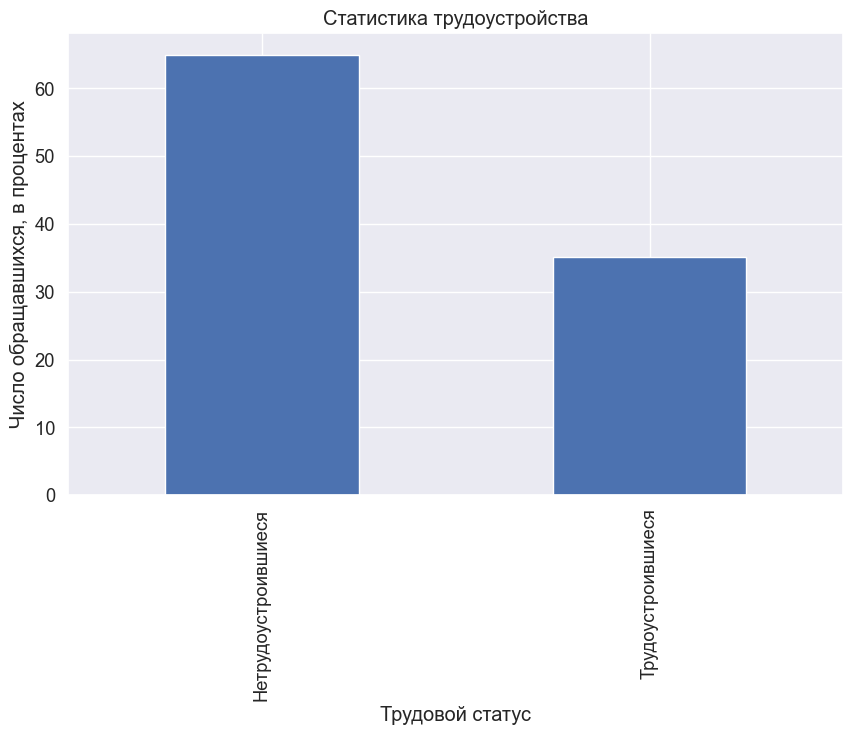

In [46]:
# Создаём столбчатую диаграмму по трудоустройству граждан (в процентном соотношении)
employed_unemployed.plot(kind='bar',
                              x='find_new_job',
                              y='perc',
                              title='Статистика трудоустройства',
                              xlabel='Трудовой статус',
                              ylabel='Число обращавшихся, в процентах',
                              legend=False)
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
Общее число устроившихся на работу граждан: 3576667 (35.1% от общего числа обращавшихся в службу занятости). Общее число неустроившихся на работу граждан: 6613539 (64.9% от общего числа обращавшихся в службу занятости).

4. Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.<br>
*4.1 Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.<br>

In [47]:
# Создаём сводную таблицу по трудоустройству по каждому году (в абсолютных значениях)
employed_unemployed_by_year = df.pivot_table(index=['year', 'find_new_job'],
                                     aggfunc='sum',
                                     values='count')
employed_unemployed_by_year = employed_unemployed_by_year.reset_index()

In [48]:
employed_unemployed_by_year

,year,find_new_job,count
0,2017,False,761182
1,2017,True,875769
2,2018,False,696596
3,2018,True,789670
4,2019,False,894742
5,2019,True,813881
6,2020,False,4261019
7,2020,True,1097347


In [49]:
employed_unemployed_by_year['find_new_job'] = employed_unemployed_by_year['find_new_job'].replace(False, 'Нетрудоустроившиеся')
employed_unemployed_by_year['find_new_job'] = employed_unemployed_by_year['find_new_job'].replace(True, 'Трудоустроившиеся')

In [50]:
employed_unemployed_by_year

,year,find_new_job,count
0,2017,Нетрудоустроившиеся,761182
1,2017,Трудоустроившиеся,875769
2,2018,Нетрудоустроившиеся,696596
3,2018,Трудоустроившиеся,789670
4,2019,Нетрудоустроившиеся,894742
5,2019,Трудоустроившиеся,813881
6,2020,Нетрудоустроившиеся,4261019
7,2020,Трудоустроившиеся,1097347


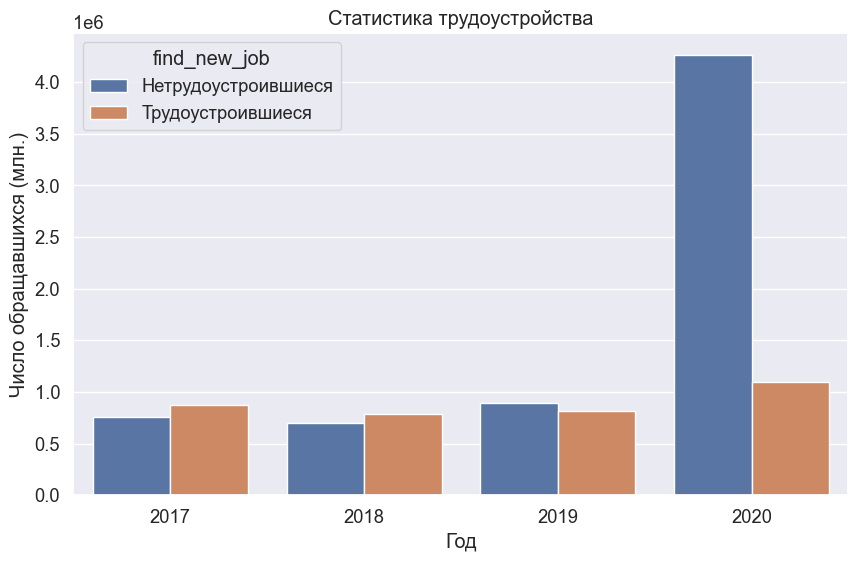

In [51]:
# Создаём столбчатую диаграмму трудоустройства по каждому году
sns.barplot(data=employed_unemployed_by_year, x='year', y='count', hue='find_new_job').set(title='Статистика трудоустройства',
                              xlabel='Год',
                              ylabel='Число обращавшихся (млн.)')
plt.show()

Почему в 2020 году так много нетрудоустроившихся? Как было выяснено выше, в 2020 году было много (больше чем раньше), обращений в служду занятоти. Почему число нетрудоустроившихся в 2020 году намного больше числа трудоустроившихся, почему такой дисбаланс? Так как в датасете 2020 год последний, то, вероятно, просто не было времени у тех, кто обратился в данном году, найти работу и, следовательно, внести факт своего трудоустройства в данный датасет.<br>
Поясним: например, человек обратился в службу занятости в 2017 году. До 2019 года он был безработным, а в 2019 году нашёл работу. И его статус поменялся, он стал трудоустроившимся, который обратился в службу занятости в 2017 году (то есть у него в столбце <code>year</code> стоит в 2017 год, а в столбце <code>find_new_job</code> теперь - 'True'). Другой случай: человек обратился в службу занятости в 2020 году. До конца 2020 года он работу не смог найти. Однако в 2021 году уже данный датасет не обновлялся. Данные в данном датасете актуальны, скорее всего, максимум на декабрь 2020 года (и то данные за декабрь 2020 года уже неполные).<br>
Таким образом, можно сказать, что у обратившегося в 2017 году было гораздо больше времени найти работу до "закрытия" датасета, чем у обратившегося в 2020 году.<br>
<br>
<b>Прим.</b>: <code>find_new_job</code> - Отметка о том, что гражданин нашел работу, <b>в какой-либо период после</b> признания безработным.

In [52]:
employed_unemployed_by_year

,year,find_new_job,count
0,2017,Нетрудоустроившиеся,761182
1,2017,Трудоустроившиеся,875769
2,2018,Нетрудоустроившиеся,696596
3,2018,Трудоустроившиеся,789670
4,2019,Нетрудоустроившиеся,894742
5,2019,Трудоустроившиеся,813881
6,2020,Нетрудоустроившиеся,4261019
7,2020,Трудоустроившиеся,1097347


In [53]:
# вспомним, что у нас есть такая сводная таблица
applications_in_year

,year,count
0,2017,1636951
1,2018,1486266
2,2019,1708623
3,2020,5358366


In [54]:
# С помощью метода merge объединяем эти таблицы по году
employed_unemployed_by_year = employed_unemployed_by_year.merge(applications_in_year, on='year')
employed_unemployed_by_year

,year,find_new_job,count_x,count_y
0,2017,Нетрудоустроившиеся,761182,1636951
1,2017,Трудоустроившиеся,875769,1636951
2,2018,Нетрудоустроившиеся,696596,1486266
3,2018,Трудоустроившиеся,789670,1486266
4,2019,Нетрудоустроившиеся,894742,1708623
5,2019,Трудоустроившиеся,813881,1708623
6,2020,Нетрудоустроившиеся,4261019,5358366
7,2020,Трудоустроившиеся,1097347,5358366


In [55]:
# Добавляем столбец с процентным соотношением трудоустроившихся и нетрудоустроившихся ВНУТРИ каждого года
employed_unemployed_by_year['perc'] = ((employed_unemployed_by_year['count_x'] / employed_unemployed_by_year['count_y']) * 100).round(2)
employed_unemployed_by_year

,year,find_new_job,count_x,count_y,perc
0,2017,Нетрудоустроившиеся,761182,1636951,46.50
1,2017,Трудоустроившиеся,875769,1636951,53.50
2,2018,Нетрудоустроившиеся,696596,1486266,46.87
3,2018,Трудоустроившиеся,789670,1486266,53.13
4,2019,Нетрудоустроившиеся,894742,1708623,52.37
5,2019,Трудоустроившиеся,813881,1708623,47.63
6,2020,Нетрудоустроившиеся,4261019,5358366,79.52
7,2020,Трудоустроившиеся,1097347,5358366,20.48


In [56]:
# Удаляем столбцы 'count_x' и 'count_y'
employed_unemployed_by_year = employed_unemployed_by_year.drop(columns = ['count_x', 'count_y'])

In [57]:
employed_unemployed_by_year

,year,find_new_job,perc
0,2017,Нетрудоустроившиеся,46.50
1,2017,Трудоустроившиеся,53.50
2,2018,Нетрудоустроившиеся,46.87
3,2018,Трудоустроившиеся,53.13
4,2019,Нетрудоустроившиеся,52.37
5,2019,Трудоустроившиеся,47.63
6,2020,Нетрудоустроившиеся,79.52
7,2020,Трудоустроившиеся,20.48


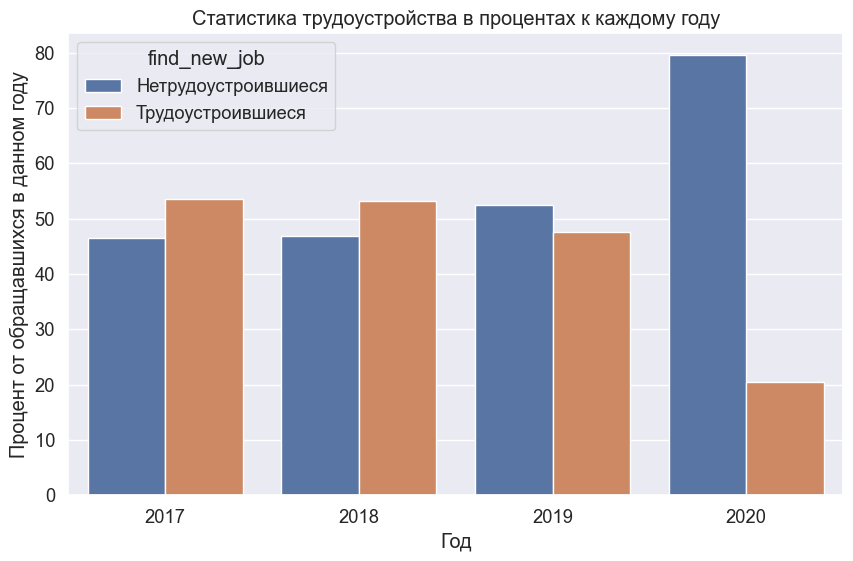

In [58]:
sns.barplot(data=employed_unemployed_by_year, x='year', y='perc', hue='find_new_job').set(title='Статистика трудоустройства в процентах к каждому году',
                              xlabel='Год',
                              ylabel='Процент от обращавшихся в данном году')
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
В 2017-2018 гг. число трудоустроившихся из числа обращавшихся в данных годах превышало число нетрудоустроившихся. В 2019-2020 гг. всё наоборот: число нетрудоустроившихся превышало число трудоустроившихся. Тем не менее процент трудоустроившихся был почти такой же как процент нетрудоустроившихся в трёх годах: 2017, 2018, 2019 гг. Особенный дисбаланс был замечен в 2020 году (79,52% нетрудоустроившихся и 20,48% трудоустроившихся). Это связано с пандемией коронавируса и сокращением рабочих мест в 2020 году. Также выше в данном пункте исследования мы написали, что это может быть связано с тем, что у обратившегося в 2017 году было гораздо больше времени найти работу до "закрытия" датасета, чем у обратившегося в 2020 году (просто не успели обновить данные).

5. Осуществите категоризацию по столбцам <code>gender</code> и <code>education</code> в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования.

In [59]:
# Создаём сводную таблицу числа обращавшихся в службу занятости по гендерному признаку
applicatioins_by_gender = df.pivot_table(index='gender',
                                     aggfunc='sum',
                                     values='count')
applicatioins_by_gender = applicatioins_by_gender.reset_index()
applicatioins_by_gender

,gender,count
0,0,5585350
1,1,4604856


In [60]:
applicatioins_by_gender['gender'] = applicatioins_by_gender['gender'].replace(0, 'женский')
applicatioins_by_gender['gender'] = applicatioins_by_gender['gender'].replace(1, 'мужской')
applicatioins_by_gender

,gender,count
0,женский,5585350
1,мужской,4604856


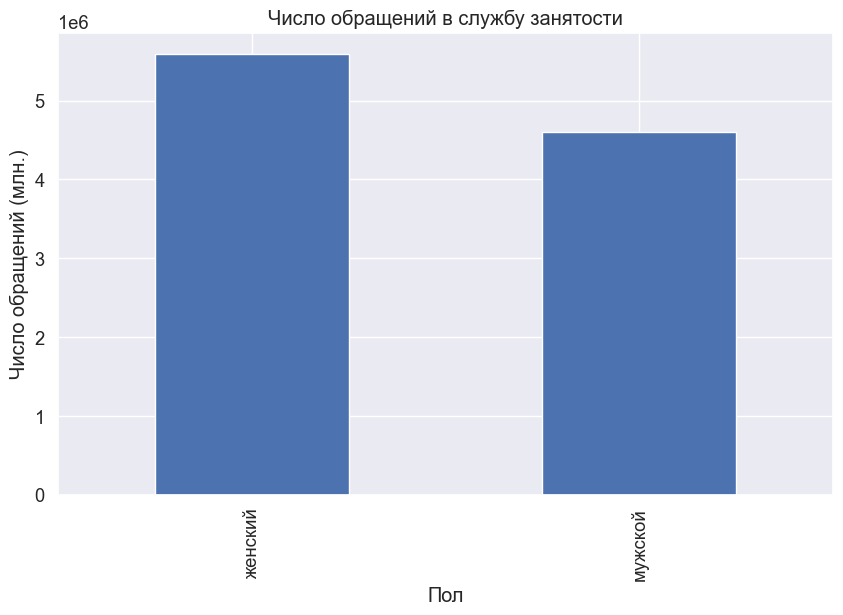

In [61]:
# Создаём столбчатую диаграмму числа обращавшихся в службу занятости по гендерному признаку
applicatioins_by_gender.plot(kind='bar',
                              x='gender',
                              y='count',
                              title='Число обращений в службу занятости',
                              xlabel='Пол',
                              ylabel='Число обращений (млн.)',
                              legend=False)
plt.show()

In [62]:
# Создаём сводную таблицу числа обращавшихся в службу занятости по уровню образования
applicatioins_by_education = df.pivot_table(index='education',
                                     aggfunc='sum',
                                     values='count')
applicatioins_by_education = applicatioins_by_education.reset_index()
applicatioins_by_education

,education,count
0,0,2138099
1,1,7866
2,2,1431099
3,3,2174286
4,4,2555968
5,6,1561036
6,9,321852


In [63]:
# Расшифруем значения уровня образования 
applicatioins_by_education = applicatioins_by_education.replace({'education':{1 : 'начальное общее образование',
                        2 : 'основное общее образование',
                        3 : 'среднее общее образование',
                        4 : 'среднее профессиональное образование',
                        6 : 'высшее образование',
                        9 : 'другое',
                        0 : 'нет данных'}})
applicatioins_by_education

,education,count
0,нет данных,2138099
1,начальное общее образование,7866
2,основное общее образование,1431099
3,среднее общее образование,2174286
4,среднее профессиональное образование,2555968
5,высшее образование,1561036
6,другое,321852


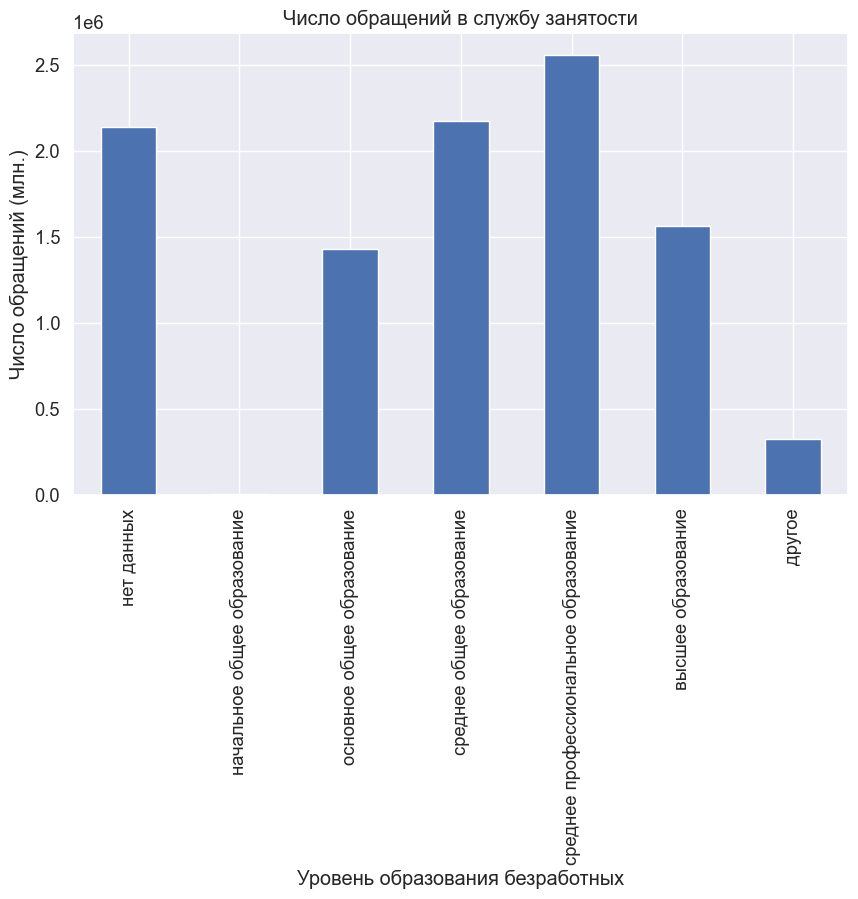

In [64]:
# Создаём столбчатую диаграмму числа обращавшихся в службу занятости по уровню образования
applicatioins_by_education.plot(kind='bar',
                              x='education',
                              y='count',
                              title='Число обращений в службу занятости',
                              xlabel='Уровень образования безработных',
                              ylabel='Число обращений (млн.)',
                              legend=False)
plt.show()

In [65]:
# Добавим в сводную таблицу информацию о том, нашёл ли гражданин работу (трудоустроен ли он)
applicatioins_by_education_find_new_job = df.pivot_table(index=['education', 'find_new_job'],
                                     aggfunc='sum',
                                     values='count')
applicatioins_by_education_find_new_job = applicatioins_by_education_find_new_job.reset_index()
applicatioins_by_education_find_new_job

,education,find_new_job,count
0,0,False,1420775
1,0,True,717324
2,1,False,5814
3,1,True,2052
4,2,False,990637
5,2,True,440462
6,3,False,1533464
7,3,True,640822
8,4,False,1530015
9,4,True,1025953


In [66]:
# Расшифруем значения уровня образования 
applicatioins_by_education_find_new_job = applicatioins_by_education_find_new_job.replace({'education':{1 : 'начальное общее образование',
                        2 : 'основное общее образование',
                        3 : 'среднее общее образование',
                        4 : 'среднее профессиональное образование',
                        6 : 'высшее образование',
                        9 : 'другое',
                        0 : 'нет данных'}})
applicatioins_by_education_find_new_job

,education,find_new_job,count
0,нет данных,False,1420775
1,нет данных,True,717324
2,начальное общее образование,False,5814
3,начальное общее образование,True,2052
4,основное общее образование,False,990637
5,основное общее образование,True,440462
6,среднее общее образование,False,1533464
7,среднее общее образование,True,640822
8,среднее профессиональное образование,False,1530015
9,среднее профессиональное образование,True,1025953


In [67]:
applicatioins_by_education_find_new_job['find_new_job'] = applicatioins_by_education_find_new_job['find_new_job'].replace(False, 'Нетрудоустроившиеся')
applicatioins_by_education_find_new_job['find_new_job'] = applicatioins_by_education_find_new_job['find_new_job'].replace(True, 'Трудоустроившиеся')
applicatioins_by_education_find_new_job

,education,find_new_job,count
0,нет данных,Нетрудоустроившиеся,1420775
1,нет данных,Трудоустроившиеся,717324
2,начальное общее образование,Нетрудоустроившиеся,5814
3,начальное общее образование,Трудоустроившиеся,2052
4,основное общее образование,Нетрудоустроившиеся,990637
5,основное общее образование,Трудоустроившиеся,440462
6,среднее общее образование,Нетрудоустроившиеся,1533464
7,среднее общее образование,Трудоустроившиеся,640822
8,среднее профессиональное образование,Нетрудоустроившиеся,1530015
9,среднее профессиональное образование,Трудоустроившиеся,1025953


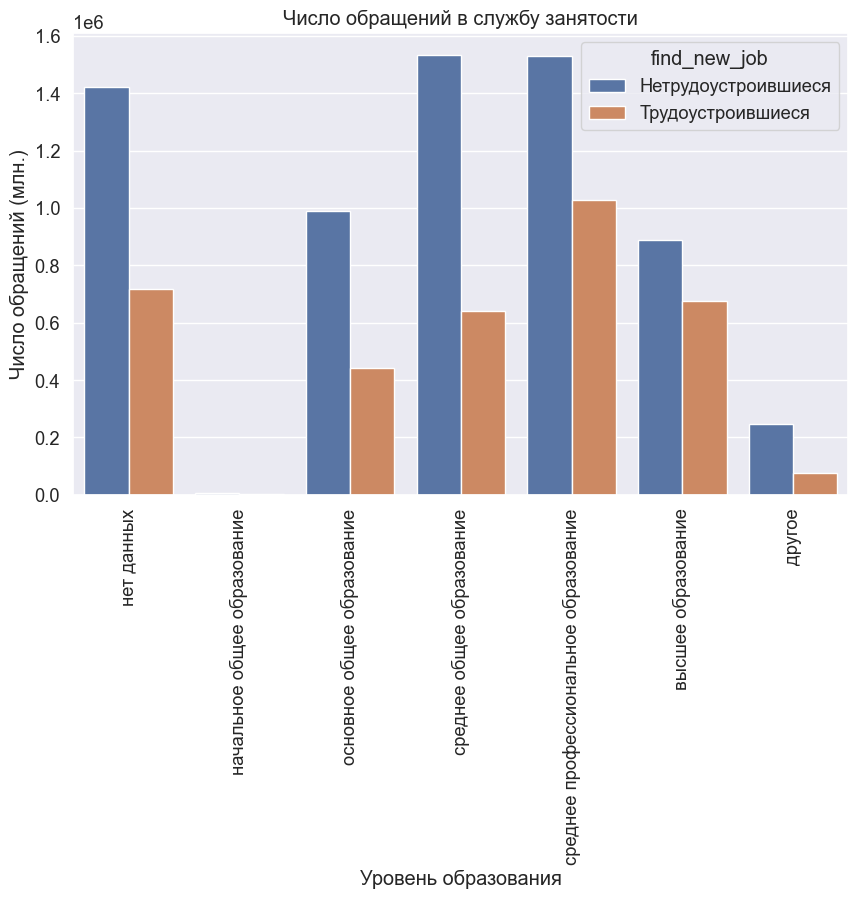

In [68]:
# Создаём столбчатую диаграмму по трудоустройству в соответствии с уровнем образования
sns.barplot(data=applicatioins_by_education_find_new_job, x='education', y='count', hue='find_new_job').set(title='Число обращений в службу занятости',
                              xlabel='Уровень образования',
                              ylabel='Число обращений (млн.)')
plt.xticks(rotation=90) # поворот подписей к столбцам на 90 градусов
plt.show()

In [69]:
# Добавим в сводную таблицу детализацию по информации органов занятости населения о том, работал ли раньше гражданин
applicatioins_by_education_didnotwork = df.pivot_table(index=['education', 'hc_didnotwork'],
                                     aggfunc='sum',
                                     values='count')
applicatioins_by_education_didnotwork = applicatioins_by_education_didnotwork.reset_index()

In [70]:
# Расшифруем значения уровня образования 
applicatioins_by_education_didnotwork = applicatioins_by_education_didnotwork.replace({'education':{1 : 'начальное общее образование',
                        2 : 'основное общее образование',
                        3 : 'среднее общее образование',
                        4 : 'среднее профессиональное образование',
                        6 : 'высшее образование',
                        9 : 'другое',
                        0 : 'нет данных'}})

In [71]:
applicatioins_by_education_didnotwork['hc_didnotwork'] = applicatioins_by_education_didnotwork['hc_didnotwork'].replace(False, 'ранее работали')
applicatioins_by_education_didnotwork['hc_didnotwork'] = applicatioins_by_education_didnotwork['hc_didnotwork'].replace(True, 'ранее не работали')
applicatioins_by_education_didnotwork

,education,hc_didnotwork,count
0,нет данных,ранее работали,2053981
1,нет данных,ранее не работали,84118
2,начальное общее образование,ранее работали,6310
3,начальное общее образование,ранее не работали,1556
4,основное общее образование,ранее работали,1043689
5,основное общее образование,ранее не работали,387410
6,среднее общее образование,ранее работали,1633727
7,среднее общее образование,ранее не работали,540559
8,среднее профессиональное образование,ранее работали,2199756
9,среднее профессиональное образование,ранее не работали,356212


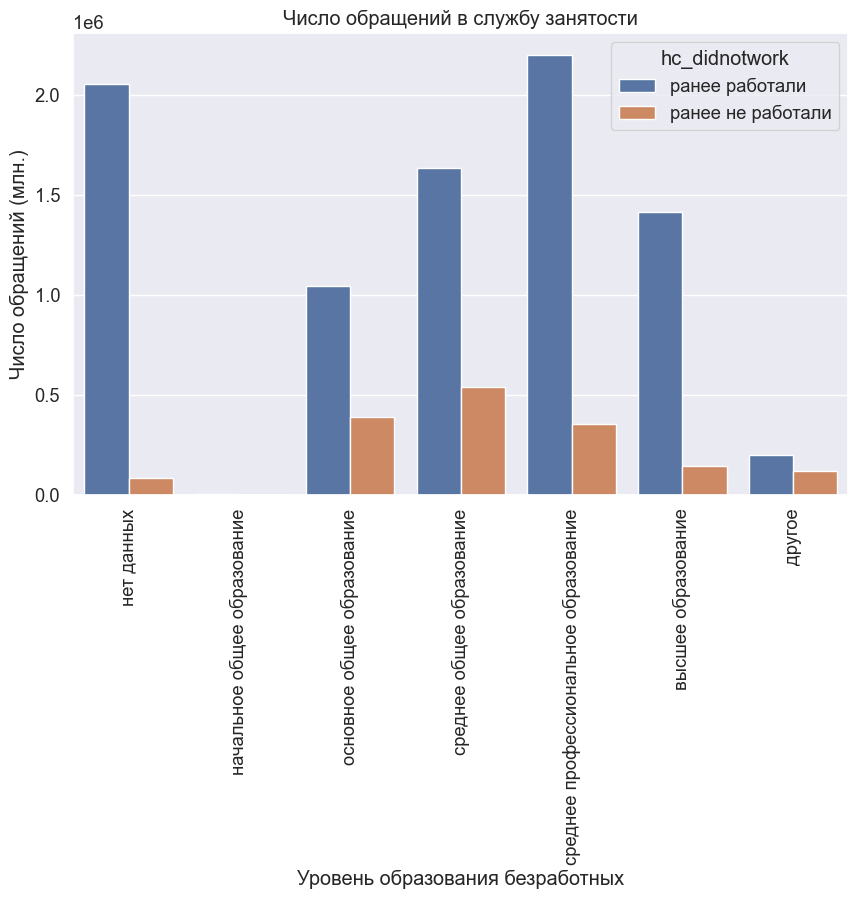

In [72]:
# Создаём столбчатую диаграмму по наличию трудового опыта до обращения в службу занятости в соответствии с уровнем образования
sns.barplot(data=applicatioins_by_education_didnotwork, x='education', y='count', hue='hc_didnotwork').set(title='Число обращений в службу занятости',
                              xlabel='Уровень образования безработных',
                              ylabel='Число обращений (млн.)')
plt.xticks(rotation=90) # поворот подписей к столбцам на 90 градусов
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
- В службу занятости больше всего обращаются женщины: 5585350 обращений (у мужчин - 4604856 обращений).
- У большинства обращающихся в службу занятости - среднее профессиональное образование. У меньшинства - начальное общее образование.
- Среди обращавшихся, которые впоследствии так и не трудоустроились, больше всего имеют среднее общее и среднее профессиональное образование. При этом больше всего трудоустроилось из тех, кто также имеет среднее профессиональное образование (здесь сказался экстенсивный фактор: граждан с таким образованием обращалось в принципе больше, чем граждан с другими уровнями образования).
- Наибольший шанс трудоустроиться имеют граждане с высшим образованием (среди обращавшихся граждан с высшим образованием 43% впоследствии трудоустроилось).
- Среди обращавшихся, которые ранее работали, больше всего граждан с средним профессиональным образованием, а среди обращавшихся, которые ранее не работали, больше всего граждан с средним общим образованием.

6. Исследуйте безработицу в России отдельно за 2020 год (за исключением декабря 2020!). Создайте срез данных.

Создаём срез данных <code>df_2020</code> и <b>дальше работаем с ним ДО КОНЦА, т.к. это всё 6 пункт исследования</b>.

In [73]:
df_2020 = df[(df['year'] == 2020)&(df['month'] != 12)]
df_2020

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month,year
1382,40299,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,28-33,0,4,True,False,True,2,1,2020
1383,41202,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,52-57,1,6,True,False,False,1,1,2020
1384,41210,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,58-60,1,2,True,False,False,2,1,2020
1385,41240,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,58-60,1,4,True,False,False,2,1,2020
1386,41223,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,58-60,1,3,True,False,False,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347396,4345135,Южный федеральный округ,Ростовская область,2020-11-01,False,16-21,1,0,False,False,False,1,11,2020
4347397,4346476,Южный федеральный округ,Ростовская область,2020-11-01,False,46-51,1,0,False,False,False,8,11,2020
4347398,4346002,Южный федеральный округ,Ростовская область,2020-11-01,False,34-39,1,0,False,False,False,7,11,2020
4347399,4345559,Южный федеральный округ,Ростовская область,2020-11-01,False,28-33,0,0,False,False,False,5,11,2020


In [74]:
applications_in_month_2020 = df_2020.pivot_table(index='month_application',
                                         aggfunc='sum',
                                         values='count')
applications_in_month_2020 = applications_in_month_2020.reset_index()
applications_in_month_2020

,month_application,count
0,2020-01-01,161713
1,2020-02-01,149366
2,2020-03-01,154166
3,2020-04-01,1020329
4,2020-05-01,797833
5,2020-06-01,775579
6,2020-07-01,657621
7,2020-08-01,538154
8,2020-09-01,417303
9,2020-10-01,372160


In [75]:
# всего обращений в 2020 году (кроме декабря)
applications_in_month_2020['count'].sum()

5321655

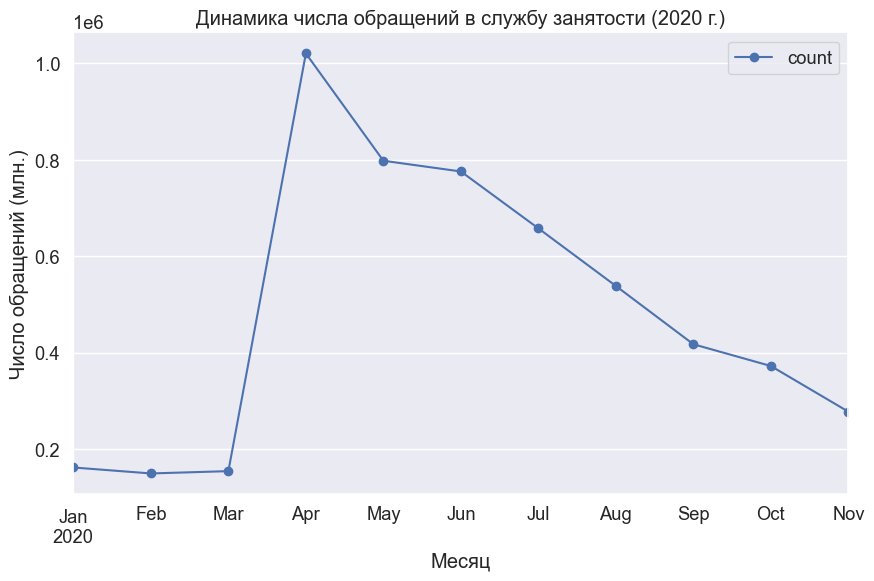

In [76]:
applications_in_month_2020.plot(x='month_application',
       y='count',
       style='o-',
       grid=True,
       figsize=(10,6),
       title='Динамика числа обращений в службу занятости (2020 г.)',
       xlabel='Месяц',
       ylabel='Число обращений (млн.)')
plt.show()

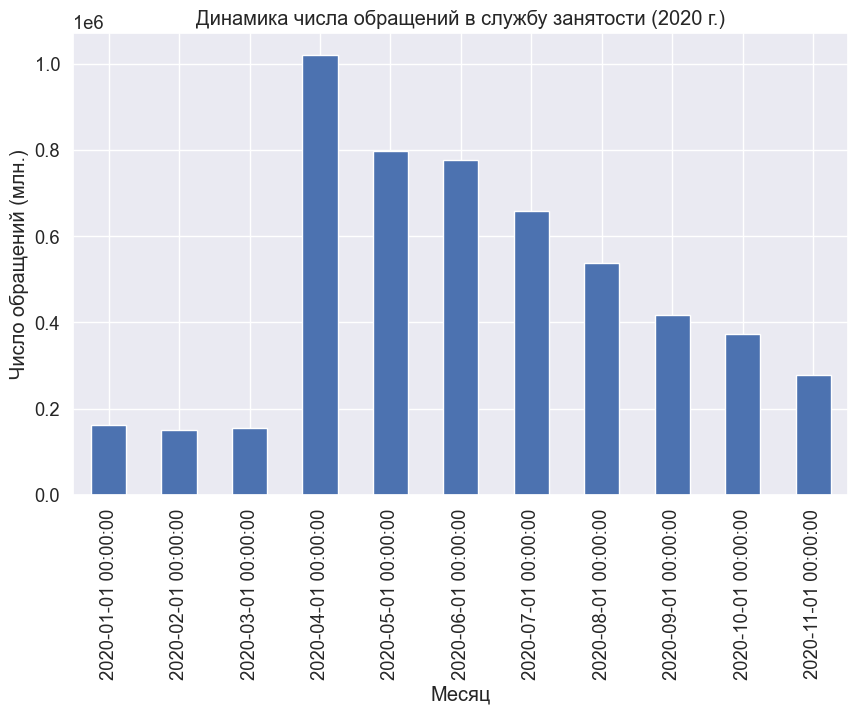

In [77]:
applications_in_month_2020.plot(kind='bar',
                              x='month_application',
                              y='count',
                              title='Динамика числа обращений в службу занятости (2020 г.)',
                              xlabel='Месяц',
                              ylabel='Число обращений (млн.)',
                              legend=False)
plt.show()

6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.

In [78]:
# Создаём сводную таблицу трудоустройства по месяцам в 2020 году
employed_unemployed_by_month_2020 = df_2020.pivot_table(index=['month', 'find_new_job'],
                                     aggfunc='sum',
                                     values='count')
employed_unemployed_by_month_2020 = employed_unemployed_by_month_2020.reset_index()
employed_unemployed_by_month_2020

,month,find_new_job,count
0,1,False,98098
1,1,True,63615
2,2,False,96326
3,2,True,53040
4,3,False,104349
5,3,True,49817
6,4,False,720765
7,4,True,299564
8,5,False,577112
9,5,True,220721


In [79]:
employed_unemployed_by_month_2020['find_new_job'] = employed_unemployed_by_month_2020['find_new_job'].replace(False, 'Нетрудоустроившиеся')
employed_unemployed_by_month_2020['find_new_job'] = employed_unemployed_by_month_2020['find_new_job'].replace(True, 'Трудоустроившиеся')

In [80]:
import calendar
# Заменим число месяца на его название применив анонимную функцию к столбцу month
employed_unemployed_by_month_2020['month'] = employed_unemployed_by_month_2020['month'].apply(lambda x: calendar.month_abbr[x])

In [81]:
employed_unemployed_by_month_2020

,month,find_new_job,count
0,Jan,Нетрудоустроившиеся,98098
1,Jan,Трудоустроившиеся,63615
2,Feb,Нетрудоустроившиеся,96326
3,Feb,Трудоустроившиеся,53040
4,Mar,Нетрудоустроившиеся,104349
5,Mar,Трудоустроившиеся,49817
6,Apr,Нетрудоустроившиеся,720765
7,Apr,Трудоустроившиеся,299564
8,May,Нетрудоустроившиеся,577112
9,May,Трудоустроившиеся,220721


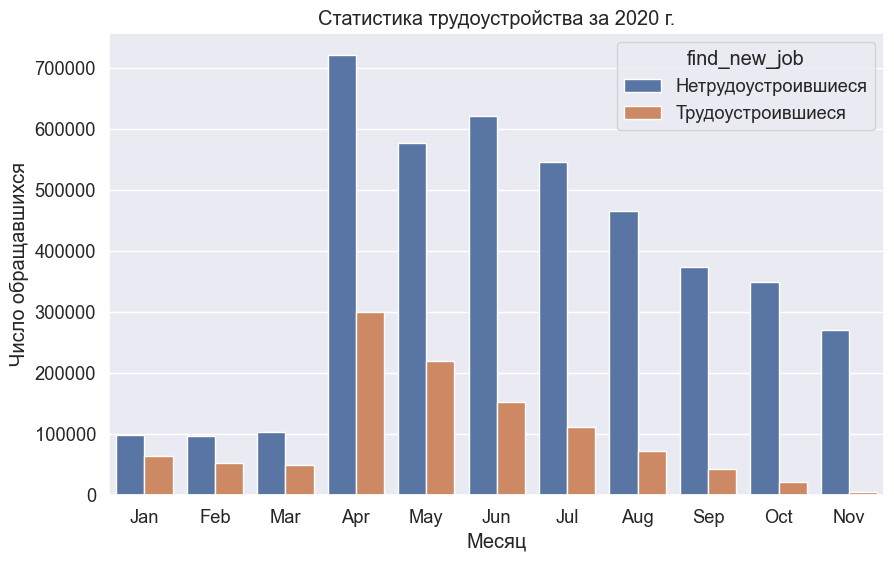

In [82]:
# Создаём столбчатую диаграмму трудоустройства по месяцам в 2020 году
sns.barplot(data=employed_unemployed_by_month_2020, x='month', y='count', hue='find_new_job').set(title='Статистика трудоустройства за 2020 г.',
                              xlabel='Месяц',
                              ylabel='Число обращавшихся')
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
Больше всего нетрудоустроившихся было в апреле. Так как в этот месяц в целом было много обратившихся в службу занятости, то трудоустроившихся тоже больше всего было в апреле.<br>
В апреле произошёл резкий скачок как трудоустроившихся, так и (в большей степени) нетрудоустроившихся. В последующие месяцы среди обращавшихся в соответствующие месяцы наблюдалось практически непрерывное сокращение и трудоустроившихся, и нетрудоустроившихся. 
Также можно заметить, что в ноябре практически не было трудоустроившихся. Это может быть связано как раз с тем, что у обращавшихся в ноябре 2020 года "не было времени" до "закрытия" датасета (об этом мы писали по ходу выполнения п. 4 данного исследования).

6.2 Определите процент трудоустройства по гендерной принадлежности

In [83]:
# Создаём сводную таблицу трудоустройства по гендерной принадлежности в 2020 году
employed_unemployed_by_gender_2020 = df_2020.pivot_table(index=['gender', 'find_new_job'],
                                     aggfunc='sum',
                                     values='count')
employed_unemployed_by_gender_2020 = employed_unemployed_by_gender_2020.reset_index()
employed_unemployed_by_gender_2020

,gender,find_new_job,count
0,0,False,2447981
1,0,True,604532
2,1,False,1776535
3,1,True,492607


In [84]:
# Снова заменим все значения в сводной таблице на более удобоваримый вариант
employed_unemployed_by_gender_2020['find_new_job'] = employed_unemployed_by_gender_2020['find_new_job'].replace(False, 'Нетрудоустроившиеся')
employed_unemployed_by_gender_2020['find_new_job'] = employed_unemployed_by_gender_2020['find_new_job'].replace(True, 'Трудоустроившиеся')
employed_unemployed_by_gender_2020['gender'] = employed_unemployed_by_gender_2020['gender'].replace(0, 'женский')
employed_unemployed_by_gender_2020['gender'] = employed_unemployed_by_gender_2020['gender'].replace(1, 'мужской')

In [85]:
employed_unemployed_by_gender_2020

,gender,find_new_job,count
0,женский,Нетрудоустроившиеся,2447981
1,женский,Трудоустроившиеся,604532
2,мужской,Нетрудоустроившиеся,1776535
3,мужской,Трудоустроившиеся,492607


In [86]:
# Создаём вспомогательную сводную таблицу числа обращавшихся только по гендерной принадлежности
applicatioins_by_gender_2020 = df_2020.pivot_table(index='gender',
                                     aggfunc='sum',
                                     values='count')
applicatioins_by_gender_2020 = applicatioins_by_gender_2020.reset_index()
applicatioins_by_gender_2020

,gender,count
0,0,3052513
1,1,2269142


In [87]:
applicatioins_by_gender_2020['gender'] = applicatioins_by_gender_2020['gender'].replace(0, 'женский')
applicatioins_by_gender_2020['gender'] = applicatioins_by_gender_2020['gender'].replace(1, 'мужской')
applicatioins_by_gender_2020

,gender,count
0,женский,3052513
1,мужской,2269142


In [88]:
# С помощью метода merge объединяем эти таблицы по году
employed_unemployed_by_gender_2020 = employed_unemployed_by_gender_2020.merge(applicatioins_by_gender_2020, on='gender')
employed_unemployed_by_gender_2020

,gender,find_new_job,count_x,count_y
0,женский,Нетрудоустроившиеся,2447981,3052513
1,женский,Трудоустроившиеся,604532,3052513
2,мужской,Нетрудоустроившиеся,1776535,2269142
3,мужской,Трудоустроившиеся,492607,2269142


In [89]:
# Добавляем столбец с процентным соотношением трудоустроившихся и нетрудоустроившихся ВНУТРИ каждого гендера
employed_unemployed_by_gender_2020['perc'] = (employed_unemployed_by_gender_2020['count_x'] / employed_unemployed_by_gender_2020['count_y'] * 100).round(2)
employed_unemployed_by_gender_2020

,gender,find_new_job,count_x,count_y,perc
0,женский,Нетрудоустроившиеся,2447981,3052513,80.20
1,женский,Трудоустроившиеся,604532,3052513,19.80
2,мужской,Нетрудоустроившиеся,1776535,2269142,78.29
3,мужской,Трудоустроившиеся,492607,2269142,21.71


In [90]:
# Удаляем столбцы 'count_x' и 'count_y'
employed_unemployed_by_gender_2020 = employed_unemployed_by_gender_2020.drop(columns = ['count_x', 'count_y'])

In [91]:
employed_unemployed_by_gender_2020

,gender,find_new_job,perc
0,женский,Нетрудоустроившиеся,80.20
1,женский,Трудоустроившиеся,19.80
2,мужской,Нетрудоустроившиеся,78.29
3,мужской,Трудоустроившиеся,21.71


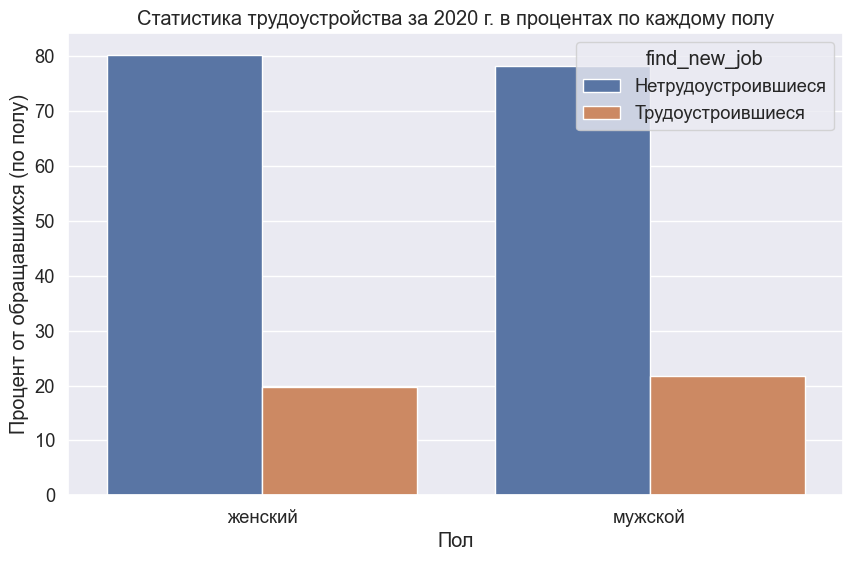

In [92]:
# Создаём столбчатую диаграмму трудоустройства по гендерной принадлежности в 2020 году
sns.barplot(data=employed_unemployed_by_gender_2020, x='gender', y='perc', hue='find_new_job').set(title='Статистика трудоустройства за 2020 г. в процентах по каждому полу',
                              xlabel='Пол',
                              ylabel='Процент от обращавшихся (по полу)')
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
- Среди женщин, обратившихся в службу занятости в 2020 году, 80,20% в дальнейшем не трудоустроились, а 19,80% - трудоустроились.
- Среди мужчин, обратившихся в службу занятости в 2020 году, 78,29% в дальнейшем не трудоустроились, а 21,71% - трудоустроились.<br>
Мы видим, что по гендерной принадлежности разница в трудоустройстве (в процентном соотношении) практически полностью отсутствует.

6.3 Определите число обращений в службу занятости по федеральным округам.

In [93]:
# Создаём сводную таблицу числа обращений в службу занятости по федеральным округам в 2020 году
applications_by_district_2020 = df_2020.pivot_table(index='district',
                                         aggfunc='sum',
                                         values='count')
applications_by_district_2020 = applications_by_district_2020.reset_index()
applications_by_district_2020

,district,count
0,Дальневосточный федеральный округ,289224
1,Приволжский федеральный округ,1048536
2,Северо-Западный федеральный округ,477798
3,Северо-Кавказский федеральный округ,701325
4,Сибирский федеральный округ,718075
5,Уральский федеральный округ,461222
6,Центральный федеральный округ,1029581
7,Южный федеральный округ,595894


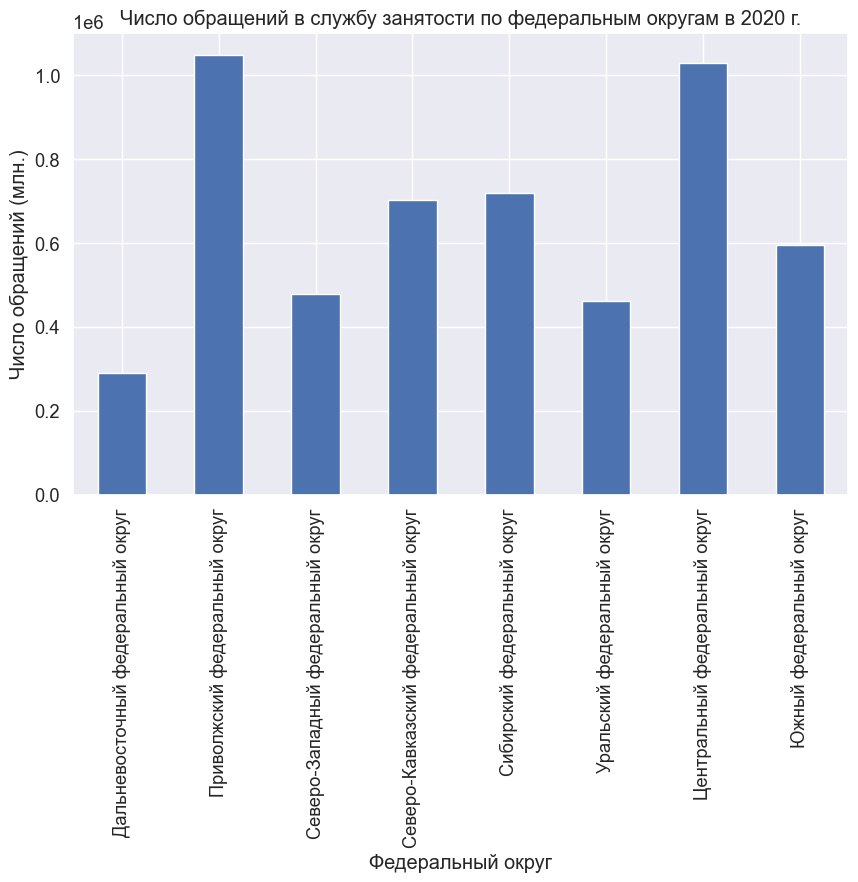

In [94]:
# Создаём столбчатую диаграмму числа обращений в службу занятости по федеральным округам в 2020 году
applications_by_district_2020.plot(kind='bar',
                              x='district',
                              y='count',
                              title='Число обращений в службу занятости по федеральным округам в 2020 г.',
                              xlabel='Федеральный округ',
                              ylabel='Число обращений (млн.)',
                              legend=False)
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
- Больше всего число обращений в службу занятости в 2020 году было зафиксировано в Приволжском и в Центральном федеральных округах (это связано с тем, что это наиболее густонаселённые федеральные округа в России).
- Меньше всего число обращений в службу занятости в 2020 году было зафиксировано в Дальневосточном федеральном округе (это связано с тем, что это наименее густонаселённый федеральный округ в России).

6.4 Определите разброс числа обращений по регионам с помощью boxplot.

In [95]:
# Создаём сводную таблицу числа обращений по федеральным округам по соответствующим каждому федеральному округу региону
applications_by_regions_in_district_2020 = df_2020.pivot_table(index=['district', 'region'],
                                         aggfunc='sum',
                                         values='count')
applications_by_regions_in_district_2020 = applications_by_regions_in_district_2020.reset_index()
applications_by_regions_in_district_2020

,district,region,count
0,Дальневосточный федеральный округ,Амурская область,30967
1,Дальневосточный федеральный округ,Еврейская автономная область,6537
2,Дальневосточный федеральный округ,Забайкальский край,53401
3,Дальневосточный федеральный округ,Камчатский край,7016
4,Дальневосточный федеральный округ,Магаданская область,3554
...,...,...,...
80,Южный федеральный округ,Республика Адыгея (Адыгея),18169
81,Южный федеральный округ,Республика Калмыкия,13955
82,Южный федеральный округ,Республика Крым,71472
83,Южный федеральный округ,Ростовская область,162703


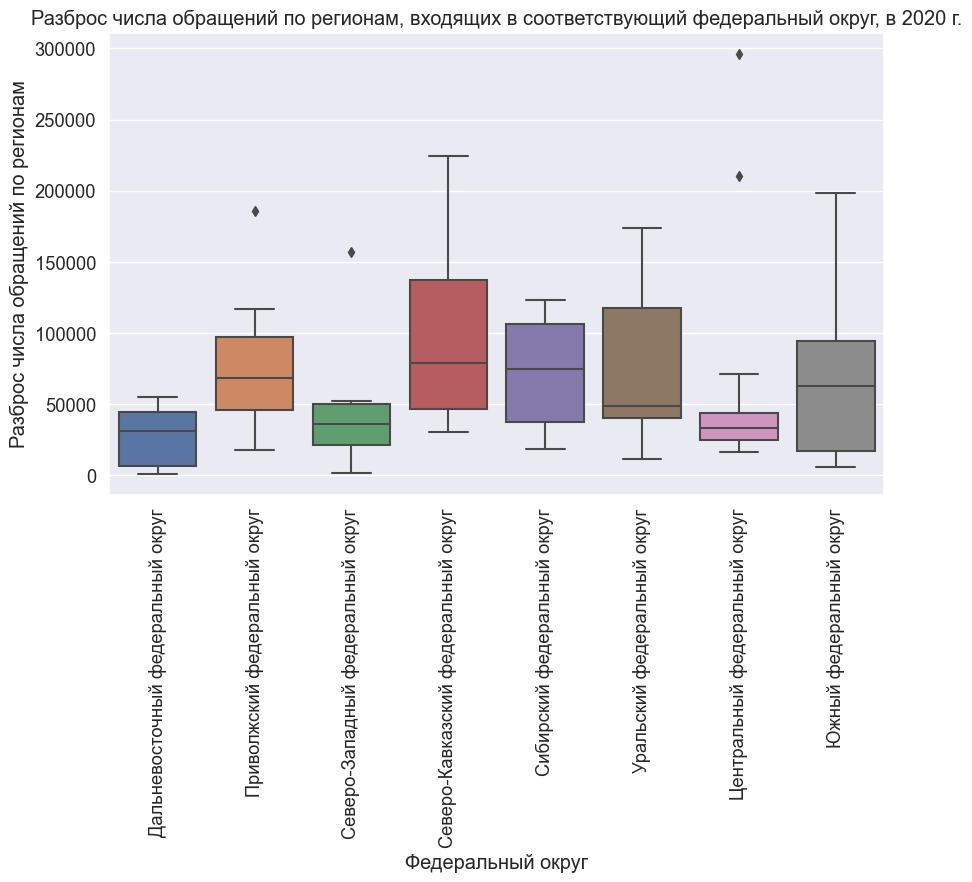

In [96]:
# Создаём boxplot (диаграмму размаха) разброса числа обращений по регионам внутри каждого федерального округа
sns.boxplot(data=applications_by_regions_in_district_2020, x='district', y='count').set(title='Разброс числа обращений по регионам, входящих в соответствующий федеральный округ, в 2020 г.',
                                                                                       xlabel='Федеральный округ',
                                                                                       ylabel='Разброс числа обращений по регионам')
plt.xticks(rotation=90)
plt.show()

Если нам не нужна детализация по федеральным округам, а нужен просто разброс числа обращений по регионам, то можно сделать так:

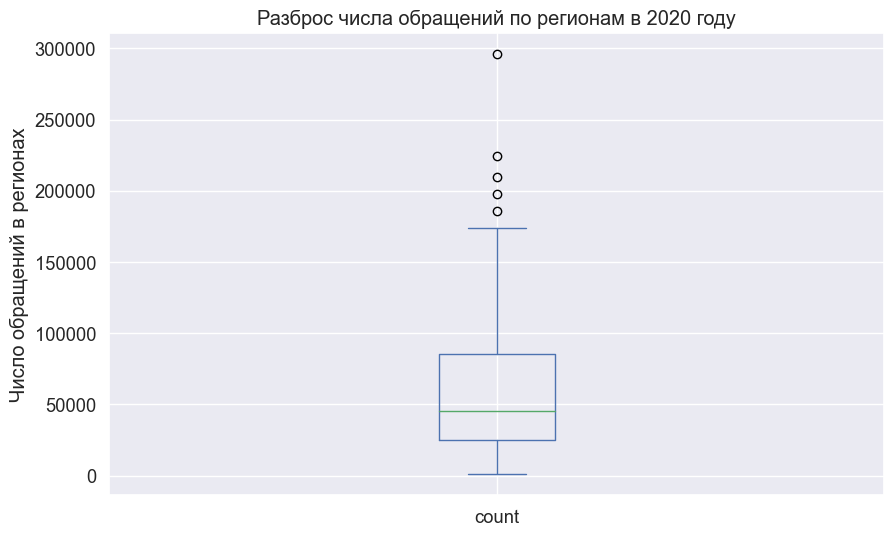

In [97]:
applications_by_regions_in_district_2020['count'].plot(kind='box', title='Разброс числа обращений по регионам в 2020 году', ylabel='Число обращений в регионах')
plt.show()

In [98]:
applications_by_regions_in_district_2020['count'].describe()

count        85.000000
mean      62607.705882
std       57417.305288
min        1227.000000
25%       24901.000000
50%       45430.000000
75%       85686.000000
max      296258.000000
Name: count, dtype: float64

<b>Вывод
<div class="alert alert-block alert-success">
    
В трёх диаграммах размаха есть выбросы (нестандартно большое для данного округа число обращений в каком-либо регионе). В Приволжском федеральном округе это - Республика Башкортостан (185516 обращений), в Северо-Западном федеральном округе это - г. Санкт-Петербург (156668 обращений), в Центральном федеральном округе это - г. Москва (296258 обращений) и Московская область (210040 обращений).<br>
Среднее число обращений по всем регионам - 62607, медианное значение - 45430.

6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.

In [99]:
# Создаём сводную таблицу числа обращений в службу занятости в Северо-Западном федеральном округе по регионам в 2020 г.
applications_in_north_western_district_by_regions_2020 = df_2020[df_2020['district'] == 'Северо-Западный федеральный округ'].pivot_table(index='region',
                                                                   aggfunc='sum',
                                                                   values='count')
applications_in_north_western_district_by_regions_2020 = applications_in_north_western_district_by_regions_2020.reset_index()
applications_in_north_western_district_by_regions_2020

,region,count
0,Архангельская область,42056
1,Вологодская область,50283
2,Калининградская область,52451
3,Ленинградская область,49637
4,Мурманская область,23166
5,Ненецкий автономный округ,1877
6,Новгородская область,20088
7,Псковская область,17499
8,Республика Карелия,27755
9,Республика Коми,36318


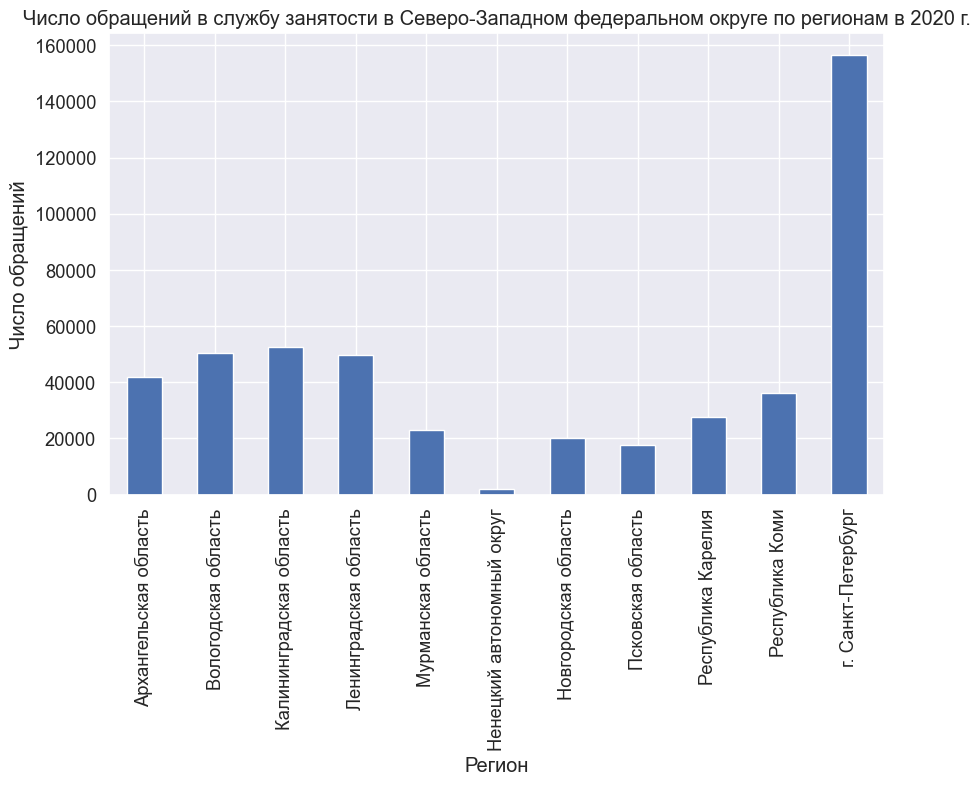

In [100]:
# Создаём столбчатую диаграмму числа обращений в службу занятости в Северо-Западном федеральном округе по регионам в 2020 г.
applications_in_north_western_district_by_regions_2020.plot(kind='bar',
                              x='region',
                              y='count',
                              title='Число обращений в службу занятости в Северо-Западном федеральном округе по регионам в 2020 г.',
                              xlabel='Регион',
                              ylabel='Число обращений',
                              legend=False)
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
Больше всего обращений в службу занятости в Северо-Западном федеральном округе в 2020 году было в г. Санкт-Петербург (156668 обращений), меньше всего - в Ненецком автономном округе (1877 обращений).	

**6.6 Определите процент трудоустройства по федеральным округам.

In [101]:
# Создаём сводную таблицу числа обращений в службу занятости в Северо-Западном федеральном округе по регионам в 2020 г.
employed_unemployed_by_district_2020 = df_2020.pivot_table(index=['district', 'find_new_job'],
                                         aggfunc='sum',
                                         values='count')
employed_unemployed_by_district_2020 = employed_unemployed_by_district_2020.reset_index()
employed_unemployed_by_district_2020

,district,find_new_job,count
0,Дальневосточный федеральный округ,False,235005
1,Дальневосточный федеральный округ,True,54219
2,Приволжский федеральный округ,False,796807
3,Приволжский федеральный округ,True,251729
4,Северо-Западный федеральный округ,False,372518
5,Северо-Западный федеральный округ,True,105280
6,Северо-Кавказский федеральный округ,False,660967
7,Северо-Кавказский федеральный округ,True,40358
8,Сибирский федеральный округ,False,535995
9,Сибирский федеральный округ,True,182080


In [102]:
# вспомним, что у нас есть такая сводная таблица
applications_by_district_2020

,district,count
0,Дальневосточный федеральный округ,289224
1,Приволжский федеральный округ,1048536
2,Северо-Западный федеральный округ,477798
3,Северо-Кавказский федеральный округ,701325
4,Сибирский федеральный округ,718075
5,Уральский федеральный округ,461222
6,Центральный федеральный округ,1029581
7,Южный федеральный округ,595894


In [103]:
# С помощью метода merge объединяем эти таблицы по федеральному округу
employed_unemployed_by_district_2020 = employed_unemployed_by_district_2020.merge(applications_by_district_2020, on='district')
employed_unemployed_by_district_2020

,district,find_new_job,count_x,count_y
0,Дальневосточный федеральный округ,False,235005,289224
1,Дальневосточный федеральный округ,True,54219,289224
2,Приволжский федеральный округ,False,796807,1048536
3,Приволжский федеральный округ,True,251729,1048536
4,Северо-Западный федеральный округ,False,372518,477798
5,Северо-Западный федеральный округ,True,105280,477798
6,Северо-Кавказский федеральный округ,False,660967,701325
7,Северо-Кавказский федеральный округ,True,40358,701325
8,Сибирский федеральный округ,False,535995,718075
9,Сибирский федеральный округ,True,182080,718075


In [104]:
# Снова заменим все значения в сводной таблице на более удобоваримый вариант
employed_unemployed_by_district_2020['find_new_job'] = employed_unemployed_by_district_2020['find_new_job'].replace(False, 'Нетрудоустроившиеся')
employed_unemployed_by_district_2020['find_new_job'] = employed_unemployed_by_district_2020['find_new_job'].replace(True, 'Трудоустроившиеся')

In [105]:
employed_unemployed_by_district_2020

,district,find_new_job,count_x,count_y
0,Дальневосточный федеральный округ,Нетрудоустроившиеся,235005,289224
1,Дальневосточный федеральный округ,Трудоустроившиеся,54219,289224
2,Приволжский федеральный округ,Нетрудоустроившиеся,796807,1048536
3,Приволжский федеральный округ,Трудоустроившиеся,251729,1048536
4,Северо-Западный федеральный округ,Нетрудоустроившиеся,372518,477798
5,Северо-Западный федеральный округ,Трудоустроившиеся,105280,477798
6,Северо-Кавказский федеральный округ,Нетрудоустроившиеся,660967,701325
7,Северо-Кавказский федеральный округ,Трудоустроившиеся,40358,701325
8,Сибирский федеральный округ,Нетрудоустроившиеся,535995,718075
9,Сибирский федеральный округ,Трудоустроившиеся,182080,718075


In [106]:
# Добавляем столбец с процентным соотношением трудоустроившихся и нетрудоустроившихся ВНУТРИ каждого федерального округа
employed_unemployed_by_district_2020['perc'] = (employed_unemployed_by_district_2020['count_x'] / employed_unemployed_by_district_2020['count_y'] * 100).round(2)
employed_unemployed_by_district_2020

,district,find_new_job,count_x,count_y,perc
0,Дальневосточный федеральный округ,Нетрудоустроившиеся,235005,289224,81.25
1,Дальневосточный федеральный округ,Трудоустроившиеся,54219,289224,18.75
2,Приволжский федеральный округ,Нетрудоустроившиеся,796807,1048536,75.99
3,Приволжский федеральный округ,Трудоустроившиеся,251729,1048536,24.01
4,Северо-Западный федеральный округ,Нетрудоустроившиеся,372518,477798,77.97
5,Северо-Западный федеральный округ,Трудоустроившиеся,105280,477798,22.03
6,Северо-Кавказский федеральный округ,Нетрудоустроившиеся,660967,701325,94.25
7,Северо-Кавказский федеральный округ,Трудоустроившиеся,40358,701325,5.75
8,Сибирский федеральный округ,Нетрудоустроившиеся,535995,718075,74.64
9,Сибирский федеральный округ,Трудоустроившиеся,182080,718075,25.36


In [107]:
# Удаляем столбцы 'count_x' и 'count_y'
employed_unemployed_by_district_2020 = employed_unemployed_by_district_2020.drop(columns = ['count_x', 'count_y'])

In [108]:
employed_unemployed_by_district_2020

,district,find_new_job,perc
0,Дальневосточный федеральный округ,Нетрудоустроившиеся,81.25
1,Дальневосточный федеральный округ,Трудоустроившиеся,18.75
2,Приволжский федеральный округ,Нетрудоустроившиеся,75.99
3,Приволжский федеральный округ,Трудоустроившиеся,24.01
4,Северо-Западный федеральный округ,Нетрудоустроившиеся,77.97
5,Северо-Западный федеральный округ,Трудоустроившиеся,22.03
6,Северо-Кавказский федеральный округ,Нетрудоустроившиеся,94.25
7,Северо-Кавказский федеральный округ,Трудоустроившиеся,5.75
8,Сибирский федеральный округ,Нетрудоустроившиеся,74.64
9,Сибирский федеральный округ,Трудоустроившиеся,25.36


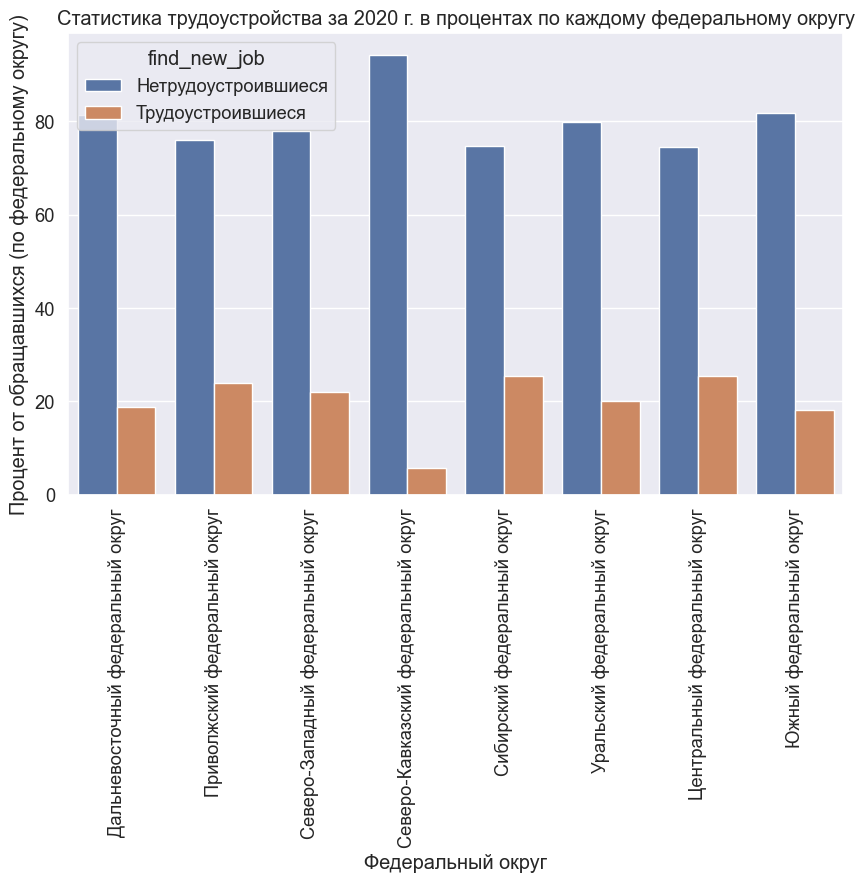

In [109]:
# Создаём столбчатую диаграмму трудоустройства по федеральным округам в процентах в 2020 г.
sns.barplot(data=employed_unemployed_by_district_2020, x='district', y='perc', hue='find_new_job').set(title='Статистика трудоустройства за 2020 г. в процентах по каждому федеральному округу',
                              xlabel='Федеральный округ',
                              ylabel='Процент от обращавшихся (по федеральному округу)')
plt.xticks(rotation=90)
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
Во всех федеральных округах в 2020 году количество нетрудоустроившихся намного превышало количество трудоустроившихся.<br>
Наибольший дисбаланс между трудоустроившимися и нетрудоустроившимися в 2020 году наблюдался в Северо-Кавказском федеральном округе (нетрудоустроившихся - 94,25%, а трудоустроившихся - всего 5.75%).

***6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле

Сначала приведём полное решение в цикле, а ниже приведём разбор данного цикла на примере одного федерального округа.

In [110]:
districts_2020 = df_2020['district'].unique().tolist()
districts_2020

['Дальневосточный федеральный округ',
 'Приволжский федеральный округ',
 'Северо-Западный федеральный округ',
 'Северо-Кавказский федеральный округ',
 'Сибирский федеральный округ',
 'Уральский федеральный округ',
 'Центральный федеральный округ',
 'Южный федеральный округ']

Дальневосточный федеральный округ
                          region         find_new_job   perc
0               Амурская область  Нетрудоустроившиеся  76.28
1               Амурская область    Трудоустроившиеся  23.72
2   Еврейская автономная область  Нетрудоустроившиеся  77.05
3   Еврейская автономная область    Трудоустроившиеся  22.95
4             Забайкальский край  Нетрудоустроившиеся  82.96
5             Забайкальский край    Трудоустроившиеся  17.04
6                Камчатский край  Нетрудоустроившиеся  73.77
7                Камчатский край    Трудоустроившиеся  26.23
8            Магаданская область  Нетрудоустроившиеся  79.99
9            Магаданская область    Трудоустроившиеся  20.01
10               Приморский край  Нетрудоустроившиеся  83.81
11               Приморский край    Трудоустроившиеся  16.19
12            Республика Бурятия  Нетрудоустроившиеся  82.68
13            Республика Бурятия    Трудоустроившиеся  17.32
14      Республика Саха (Якутия)  Нетрудоустроившие

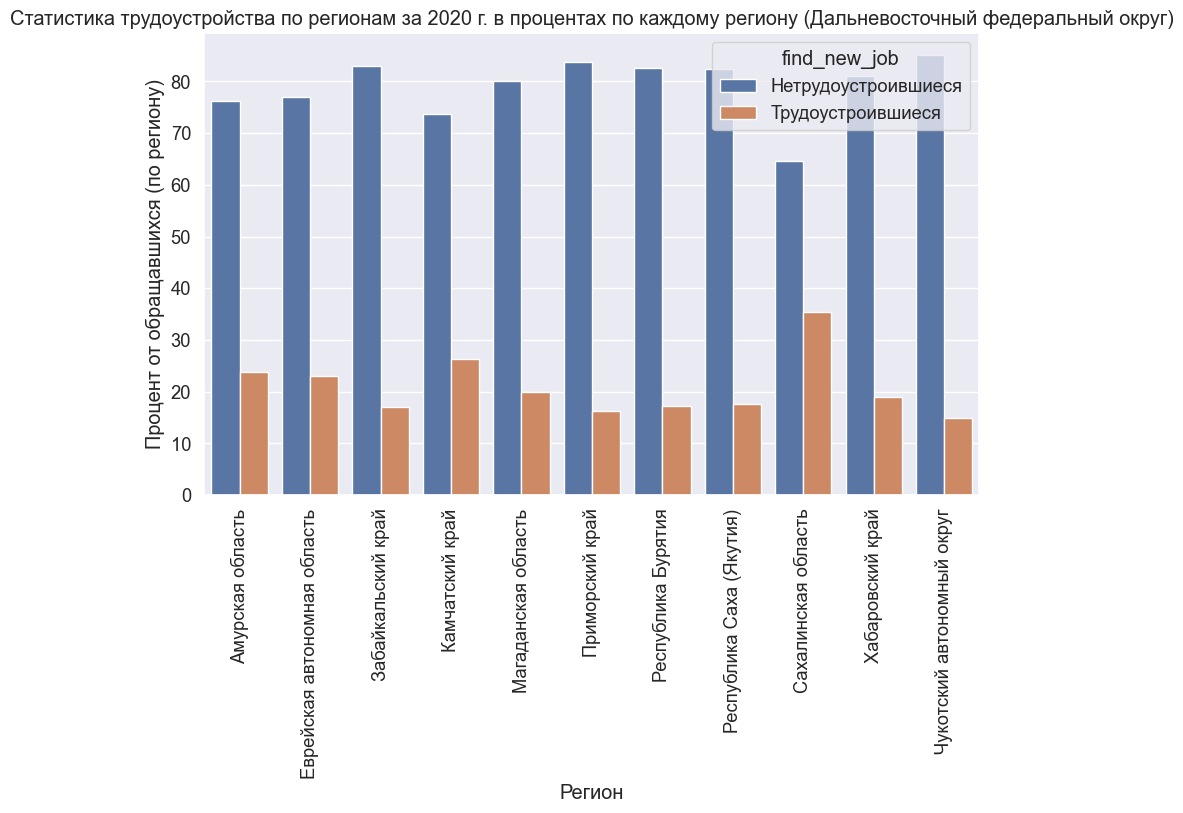

Приволжский федеральный округ
                              region         find_new_job   perc
0                  Кировская область  Нетрудоустроившиеся  71.71
1                  Кировская область    Трудоустроившиеся  28.29
2              Нижегородская область  Нетрудоустроившиеся  77.29
3              Нижегородская область    Трудоустроившиеся  22.71
4               Оренбургская область  Нетрудоустроившиеся  81.87
5               Оренбургская область    Трудоустроившиеся  18.13
6                 Пензенская область  Нетрудоустроившиеся  55.75
7                 Пензенская область    Трудоустроившиеся  44.25
8                      Пермский край  Нетрудоустроившиеся  74.35
9                      Пермский край    Трудоустроившиеся  25.65
10           Республика Башкортостан  Нетрудоустроившиеся  79.74
11           Республика Башкортостан    Трудоустроившиеся  20.26
12               Республика Марий Эл  Нетрудоустроившиеся  76.73
13               Республика Марий Эл    Трудоустроившиеся  2

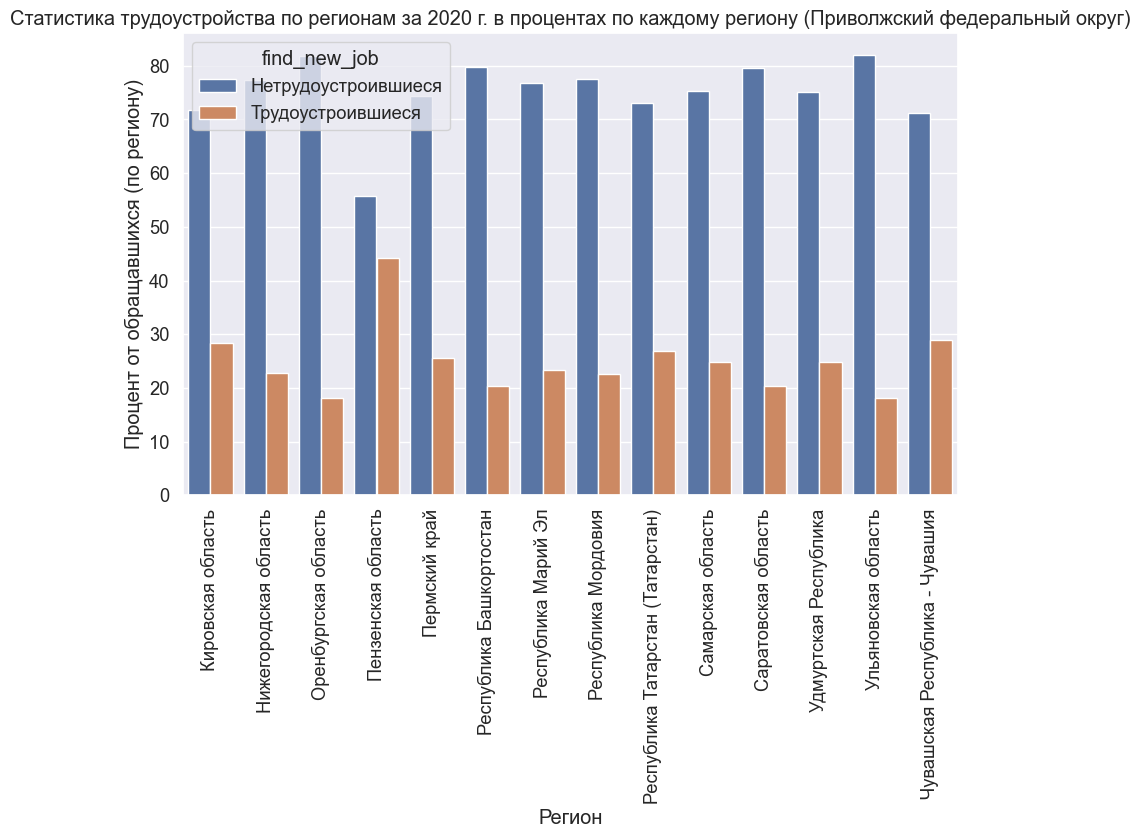

Северо-Западный федеральный округ
                       region         find_new_job   perc
0       Архангельская область  Нетрудоустроившиеся  78.24
1       Архангельская область    Трудоустроившиеся  21.76
2         Вологодская область  Нетрудоустроившиеся  74.42
3         Вологодская область    Трудоустроившиеся  25.58
4     Калининградская область  Нетрудоустроившиеся  83.37
5     Калининградская область    Трудоустроившиеся  16.63
6       Ленинградская область  Нетрудоустроившиеся  78.39
7       Ленинградская область    Трудоустроившиеся  21.61
8          Мурманская область  Нетрудоустроившиеся  72.19
9          Мурманская область    Трудоустроившиеся  27.81
10  Ненецкий автономный округ  Нетрудоустроившиеся  81.35
11  Ненецкий автономный округ    Трудоустроившиеся  18.65
12       Новгородская область  Нетрудоустроившиеся  78.00
13       Новгородская область    Трудоустроившиеся  22.00
14          Псковская область  Нетрудоустроившиеся  78.73
15          Псковская область    Трудо

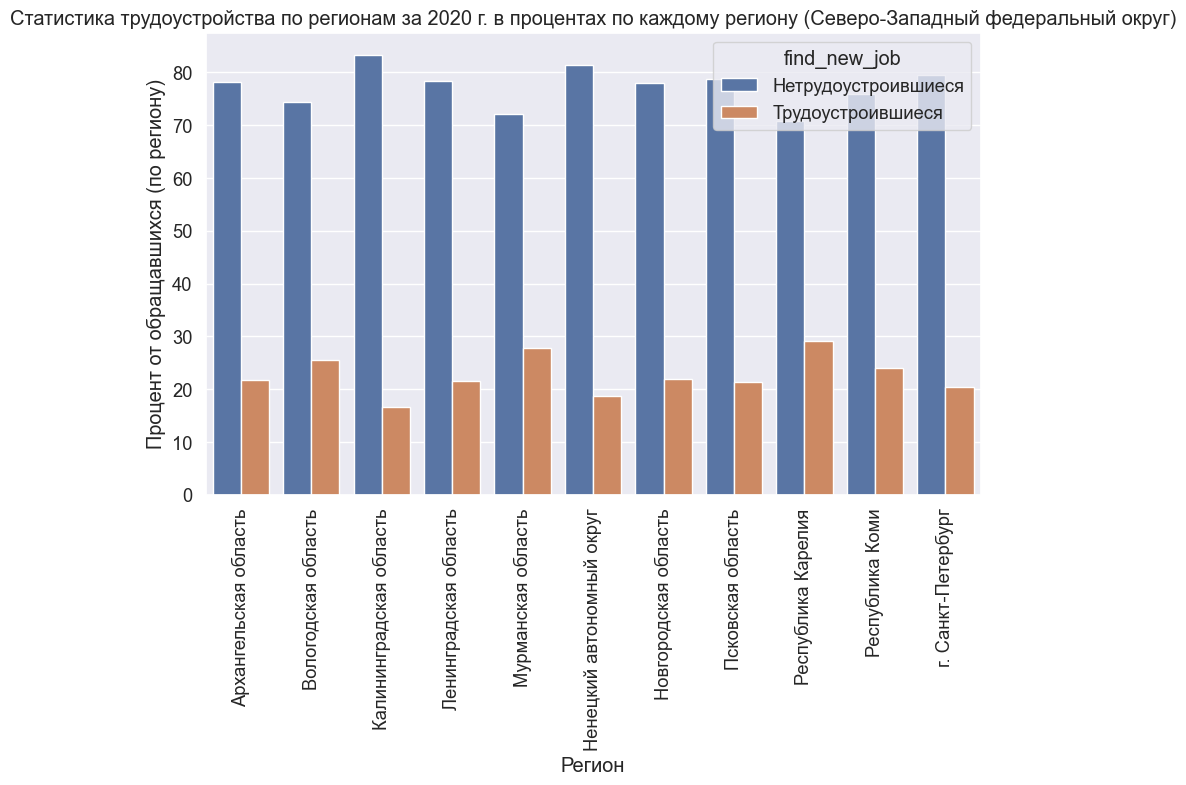

Северо-Кавказский федеральный округ
                                 region         find_new_job   perc
0       Кабардино-Балкарская Республика  Нетрудоустроившиеся  97.23
1       Кабардино-Балкарская Республика    Трудоустроившиеся   2.77
2       Карачаево-Черкесская Республика  Нетрудоустроившиеся  93.09
3       Карачаево-Черкесская Республика    Трудоустроившиеся   6.91
4                   Республика Дагестан  Нетрудоустроившиеся  94.54
5                   Республика Дагестан    Трудоустроившиеся   5.46
6                  Республика Ингушетия  Нетрудоустроившиеся  99.92
7                  Республика Ингушетия    Трудоустроившиеся   0.08
8   Республика Северная Осетия - Алания  Нетрудоустроившиеся  96.46
9   Республика Северная Осетия - Алания    Трудоустроившиеся   3.54
10                  Ставропольский край  Нетрудоустроившиеся  86.11
11                  Ставропольский край    Трудоустроившиеся  13.89
12                 Чеченская Республика  Нетрудоустроившиеся  95.01
13          

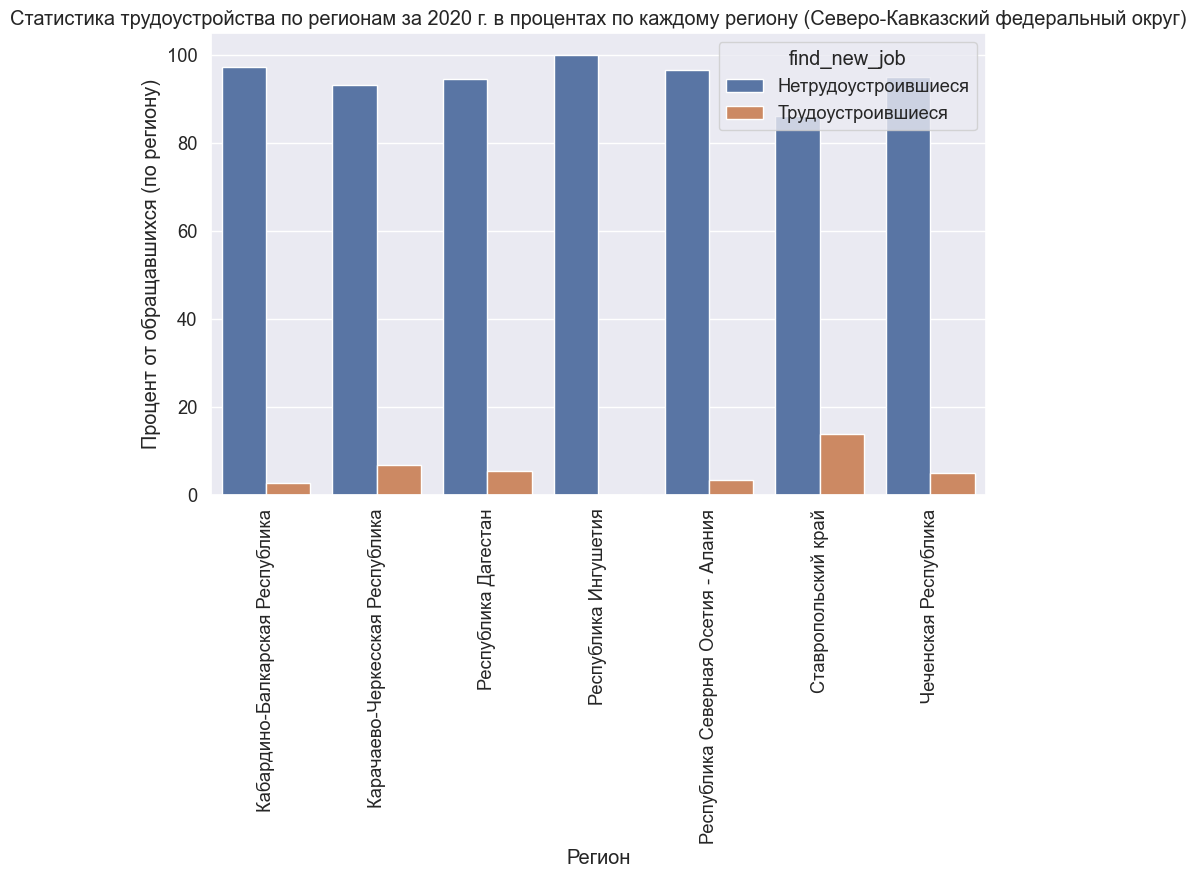

Сибирский федеральный округ
                   region         find_new_job   perc
0          Алтайский край  Нетрудоустроившиеся  75.50
1          Алтайский край    Трудоустроившиеся  24.50
2       Иркутская область  Нетрудоустроившиеся  70.77
3       Иркутская область    Трудоустроившиеся  29.23
4     Кемеровская область  Нетрудоустроившиеся  77.33
5     Кемеровская область    Трудоустроившиеся  22.67
6       Красноярский край  Нетрудоустроившиеся  70.43
7       Красноярский край    Трудоустроившиеся  29.57
8   Новосибирская область  Нетрудоустроившиеся  68.17
9   Новосибирская область    Трудоустроившиеся  31.83
10         Омская область  Нетрудоустроившиеся  77.11
11         Омская область    Трудоустроившиеся  22.89
12       Республика Алтай  Нетрудоустроившиеся  84.27
13       Республика Алтай    Трудоустроившиеся  15.73
14        Республика Тыва  Нетрудоустроившиеся  88.52
15        Республика Тыва    Трудоустроившиеся  11.48
16     Республика Хакасия  Нетрудоустроившиеся  75.02


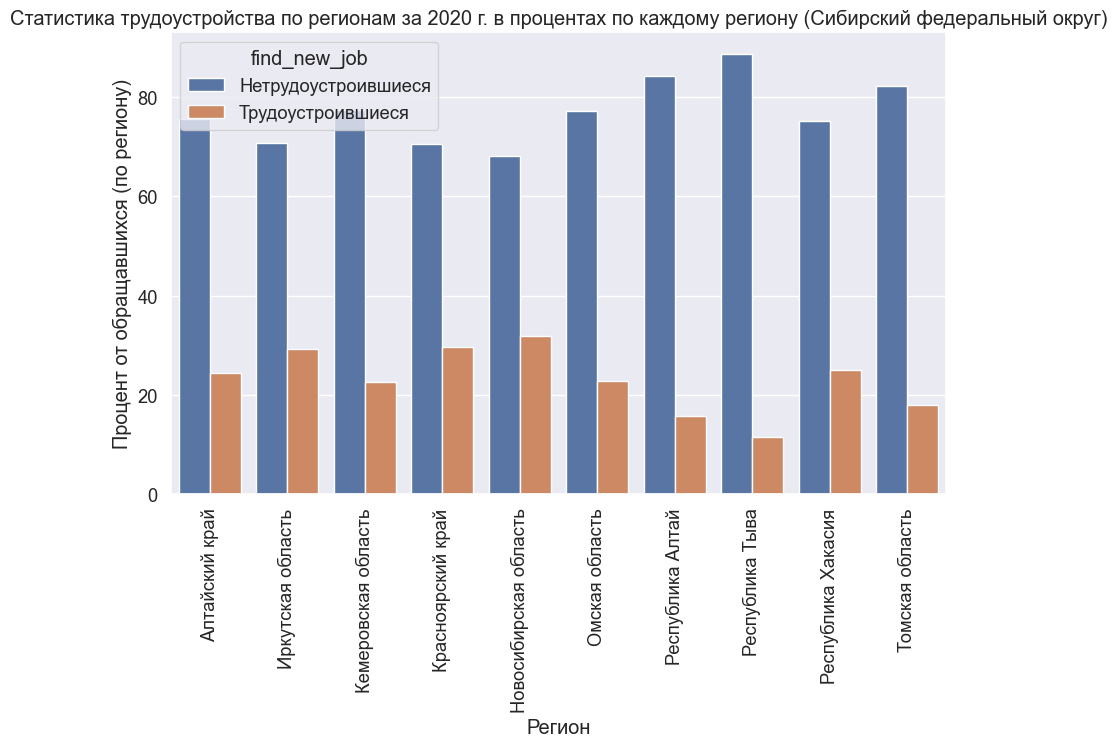

Уральский федеральный округ
                                      region         find_new_job   perc
0                         Курганская область  Нетрудоустроившиеся  79.30
1                         Курганская область    Трудоустроившиеся  20.70
2                       Свердловская область  Нетрудоустроившиеся  80.60
3                       Свердловская область    Трудоустроившиеся  19.40
4                          Тюменская область  Нетрудоустроившиеся  72.89
5                          Тюменская область    Трудоустроившиеся  27.11
6   Ханты-Мансийский автономный округ - Югра  Нетрудоустроившиеся  80.30
7   Ханты-Мансийский автономный округ - Югра    Трудоустроившиеся  19.70
8                        Челябинская область  Нетрудоустроившиеся  82.24
9                        Челябинская область    Трудоустроившиеся  17.76
10           Ямало-Ненецкий автономный округ  Нетрудоустроившиеся  73.78
11           Ямало-Ненецкий автономный округ    Трудоустроившиеся  26.22


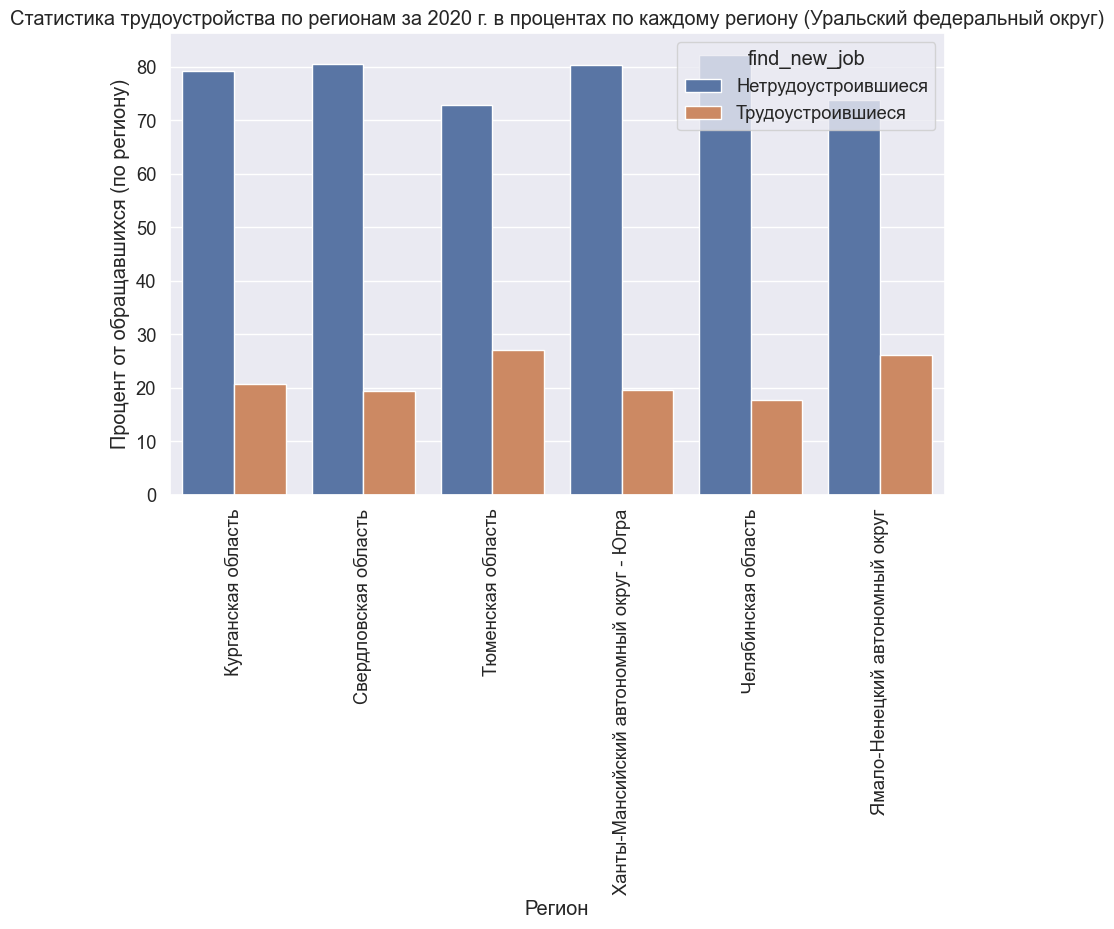

Центральный федеральный округ
                  region         find_new_job   perc
0   Белгородская область  Нетрудоустроившиеся  55.07
1   Белгородская область    Трудоустроившиеся  44.93
2       Брянская область  Нетрудоустроившиеся  78.55
3       Брянская область    Трудоустроившиеся  21.45
4   Владимирская область  Нетрудоустроившиеся  70.85
5   Владимирская область    Трудоустроившиеся  29.15
6    Воронежская область  Нетрудоустроившиеся  81.02
7    Воронежская область    Трудоустроившиеся  18.98
8     Ивановская область  Нетрудоустроившиеся  80.09
9     Ивановская область    Трудоустроившиеся  19.91
10     Калужская область  Нетрудоустроившиеся  76.86
11     Калужская область    Трудоустроившиеся  23.14
12   Костромская область  Нетрудоустроившиеся  75.29
13   Костромская область    Трудоустроившиеся  24.71
14       Курская область  Нетрудоустроившиеся  73.38
15       Курская область    Трудоустроившиеся  26.62
16      Липецкая область  Нетрудоустроившиеся  66.60
17      Липецкая

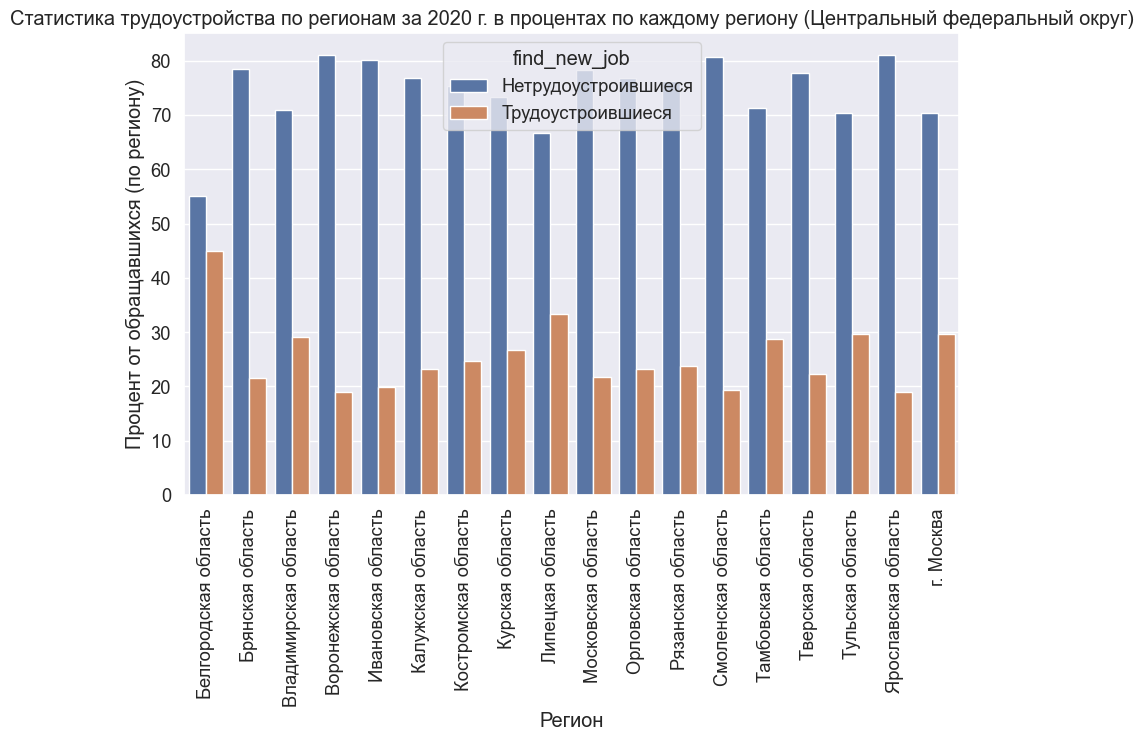

Южный федеральный округ
                        region         find_new_job   perc
0         Астраханская область  Нетрудоустроившиеся  82.70
1         Астраханская область    Трудоустроившиеся  17.30
2        Волгоградская область  Нетрудоустроившиеся  77.28
3        Волгоградская область    Трудоустроившиеся  22.72
4           Краснодарский край  Нетрудоустроившиеся  82.54
5           Краснодарский край    Трудоустроившиеся  17.46
6   Республика Адыгея (Адыгея)  Нетрудоустроившиеся  85.27
7   Республика Адыгея (Адыгея)    Трудоустроившиеся  14.73
8          Республика Калмыкия  Нетрудоустроившиеся  86.52
9          Республика Калмыкия    Трудоустроившиеся  13.48
10             Республика Крым  Нетрудоустроившиеся  83.32
11             Республика Крым    Трудоустроившиеся  16.68
12          Ростовская область  Нетрудоустроившиеся  81.11
13          Ростовская область    Трудоустроившиеся  18.89
14              г. Севастополь  Нетрудоустроившиеся  75.77
15              г. Севастополь  

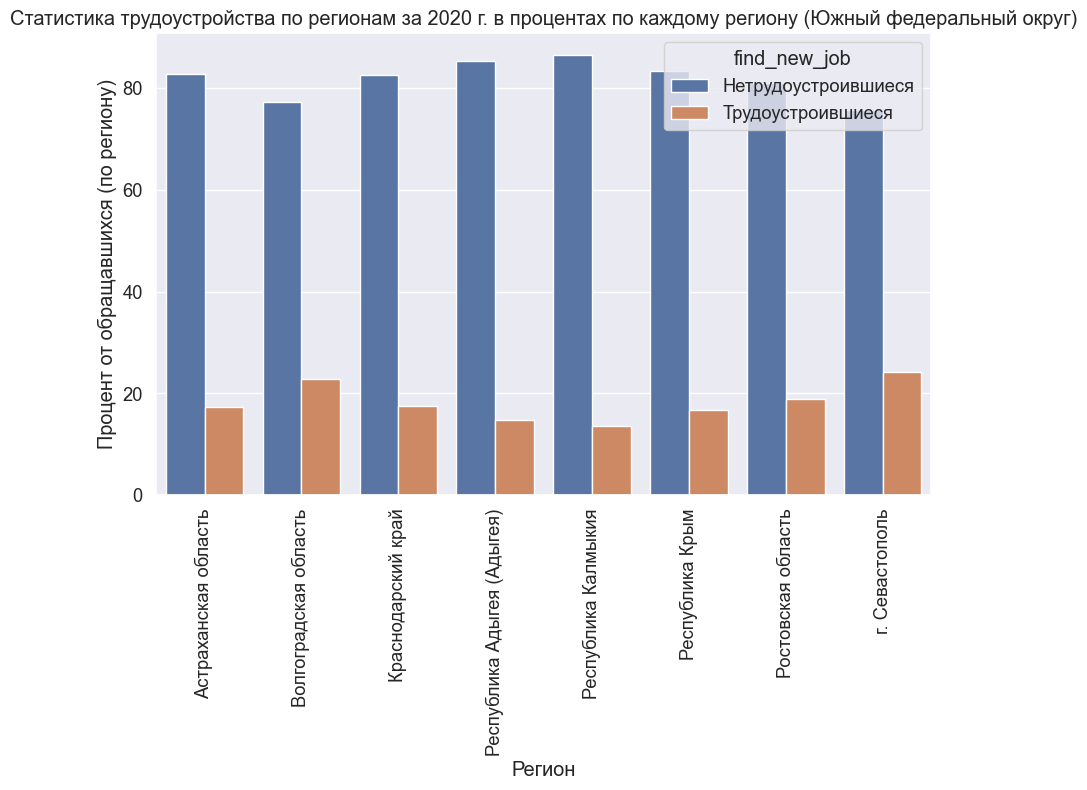

In [111]:
for element in districts_2020:
    # выводим название федерального округа
    print(element)
    # Создаём сводную таблицу трудоустройства в данном федеральном округе по регионам в 2020 г.
    employed_unemployed_in_this_district_by_regions_2020 = df_2020[df_2020['district'] == element].pivot_table(index=['region', 'find_new_job'],
                                                                   aggfunc='sum',
                                                                   values='count')
    # перезаписываем индексы
    employed_unemployed_in_this_district_by_regions_2020 = employed_unemployed_in_this_district_by_regions_2020.reset_index()
    # В столбце 'find_new_job' заменяем False на 'Нетрудоустроившиеся', а True на 'Трудоустроившиеся'
    employed_unemployed_in_this_district_by_regions_2020['find_new_job'] = employed_unemployed_in_this_district_by_regions_2020['find_new_job'].replace(False, 'Нетрудоустроившиеся')
    employed_unemployed_in_this_district_by_regions_2020['find_new_job'] = employed_unemployed_in_this_district_by_regions_2020['find_new_job'].replace(True, 'Трудоустроившиеся')
    # Создаём вспомогательную таблицу (по сути это то же самое, что и выше, только в index не список, а просто 'region')
    applications_in_this_district_by_regions_2020 = df_2020[df_2020['district'] == element].pivot_table(index='region',
                                                                   aggfunc='sum',
                                                                   values='count')
    # перезаписываем индексы
    applications_in_this_district_by_regions_2020 = applications_in_this_district_by_regions_2020.reset_index()
    # С помощью метода merge объединяем эти таблицы по региону
    employed_unemployed_in_this_district_by_regions_2020 = employed_unemployed_in_this_district_by_regions_2020.merge(applications_in_this_district_by_regions_2020, on='region')
    # Добавляем столбец с процентным соотношением трудоустроившихся и нетрудоустроившихся ВНУТРИ каждого региона
    employed_unemployed_in_this_district_by_regions_2020['perc'] = (employed_unemployed_in_this_district_by_regions_2020['count_x'] / employed_unemployed_in_this_district_by_regions_2020['count_y'] * 100).round(2)
    # Удаляем столбцы 'count_x' и 'count_y'
    employed_unemployed_in_this_district_by_regions_2020 = employed_unemployed_in_this_district_by_regions_2020.drop(columns = ['count_x', 'count_y'])
    # Выводим на экран получившуюся таблицу
    print(employed_unemployed_in_this_district_by_regions_2020)
    # Создаём столбчатую диаграмму трудоустройства по регионам в процентах в 2020 г.
    # Через f-строку заголовок задаём!
    sns.barplot(data=employed_unemployed_in_this_district_by_regions_2020, x='region', y='perc', hue='find_new_job').set(title=f'Статистика трудоустройства по регионам за 2020 г. в процентах по каждому региону ({element})',
                                                                                   xlabel='Регион',
                                                                                   ylabel='Процент от обращавшихся (по региону)')
    # Поворачиваем подписи к столбцам на 90 градусов
    plt.xticks(rotation=90)
    # Выводим столбчатую диаграмму на экран
    plt.show()

Разбор вышеприведённого цикла на примере Северо-Западного федерального округа.

In [112]:
employed_unemployed_in_this_district_by_regions_2020 = df_2020[df_2020['district'] == 'Северо-Западный федеральный округ'].pivot_table(index=['region', 'find_new_job'],
                                                                   aggfunc='sum',
                                                                   values='count')
employed_unemployed_in_this_district_by_regions_2020 = employed_unemployed_in_this_district_by_regions_2020.reset_index()
employed_unemployed_in_this_district_by_regions_2020

,region,find_new_job,count
0,Архангельская область,False,32904
1,Архангельская область,True,9152
2,Вологодская область,False,37423
3,Вологодская область,True,12860
4,Калининградская область,False,43731
5,Калининградская область,True,8720
6,Ленинградская область,False,38911
7,Ленинградская область,True,10726
8,Мурманская область,False,16724
9,Мурманская область,True,6442


In [113]:
employed_unemployed_in_this_district_by_regions_2020['find_new_job'] = employed_unemployed_in_this_district_by_regions_2020['find_new_job'].replace(False, 'Нетрудоустроившиеся')
employed_unemployed_in_this_district_by_regions_2020['find_new_job'] = employed_unemployed_in_this_district_by_regions_2020['find_new_job'].replace(True, 'Трудоустроившиеся')
employed_unemployed_in_this_district_by_regions_2020

,region,find_new_job,count
0,Архангельская область,Нетрудоустроившиеся,32904
1,Архангельская область,Трудоустроившиеся,9152
2,Вологодская область,Нетрудоустроившиеся,37423
3,Вологодская область,Трудоустроившиеся,12860
4,Калининградская область,Нетрудоустроившиеся,43731
5,Калининградская область,Трудоустроившиеся,8720
6,Ленинградская область,Нетрудоустроившиеся,38911
7,Ленинградская область,Трудоустроившиеся,10726
8,Мурманская область,Нетрудоустроившиеся,16724
9,Мурманская область,Трудоустроившиеся,6442


In [114]:
applications_in_this_district_by_regions_2020 = df_2020[df_2020['district'] == 'Северо-Западный федеральный округ'].pivot_table(index='region',
                                                                   aggfunc='sum',
                                                                   values='count')
applications_in_this_district_by_regions_2020 = applications_in_this_district_by_regions_2020.reset_index()
applications_in_this_district_by_regions_2020

,region,count
0,Архангельская область,42056
1,Вологодская область,50283
2,Калининградская область,52451
3,Ленинградская область,49637
4,Мурманская область,23166
5,Ненецкий автономный округ,1877
6,Новгородская область,20088
7,Псковская область,17499
8,Республика Карелия,27755
9,Республика Коми,36318


In [115]:
employed_unemployed_in_this_district_by_regions_2020 = employed_unemployed_in_this_district_by_regions_2020.merge(applications_in_this_district_by_regions_2020, on='region')
employed_unemployed_in_this_district_by_regions_2020

,region,find_new_job,count_x,count_y
0,Архангельская область,Нетрудоустроившиеся,32904,42056
1,Архангельская область,Трудоустроившиеся,9152,42056
2,Вологодская область,Нетрудоустроившиеся,37423,50283
3,Вологодская область,Трудоустроившиеся,12860,50283
4,Калининградская область,Нетрудоустроившиеся,43731,52451
5,Калининградская область,Трудоустроившиеся,8720,52451
6,Ленинградская область,Нетрудоустроившиеся,38911,49637
7,Ленинградская область,Трудоустроившиеся,10726,49637
8,Мурманская область,Нетрудоустроившиеся,16724,23166
9,Мурманская область,Трудоустроившиеся,6442,23166


In [116]:
employed_unemployed_in_this_district_by_regions_2020['perc'] = (employed_unemployed_in_this_district_by_regions_2020['count_x'] / employed_unemployed_in_this_district_by_regions_2020['count_y'] * 100).round(2)
employed_unemployed_in_this_district_by_regions_2020

,region,find_new_job,count_x,count_y,perc
0,Архангельская область,Нетрудоустроившиеся,32904,42056,78.24
1,Архангельская область,Трудоустроившиеся,9152,42056,21.76
2,Вологодская область,Нетрудоустроившиеся,37423,50283,74.42
3,Вологодская область,Трудоустроившиеся,12860,50283,25.58
4,Калининградская область,Нетрудоустроившиеся,43731,52451,83.37
5,Калининградская область,Трудоустроившиеся,8720,52451,16.63
6,Ленинградская область,Нетрудоустроившиеся,38911,49637,78.39
7,Ленинградская область,Трудоустроившиеся,10726,49637,21.61
8,Мурманская область,Нетрудоустроившиеся,16724,23166,72.19
9,Мурманская область,Трудоустроившиеся,6442,23166,27.81


In [117]:
employed_unemployed_in_this_district_by_regions_2020 = employed_unemployed_in_this_district_by_regions_2020.drop(columns = ['count_x', 'count_y'])
employed_unemployed_in_this_district_by_regions_2020

,region,find_new_job,perc
0,Архангельская область,Нетрудоустроившиеся,78.24
1,Архангельская область,Трудоустроившиеся,21.76
2,Вологодская область,Нетрудоустроившиеся,74.42
3,Вологодская область,Трудоустроившиеся,25.58
4,Калининградская область,Нетрудоустроившиеся,83.37
5,Калининградская область,Трудоустроившиеся,16.63
6,Ленинградская область,Нетрудоустроившиеся,78.39
7,Ленинградская область,Трудоустроившиеся,21.61
8,Мурманская область,Нетрудоустроившиеся,72.19
9,Мурманская область,Трудоустроившиеся,27.81


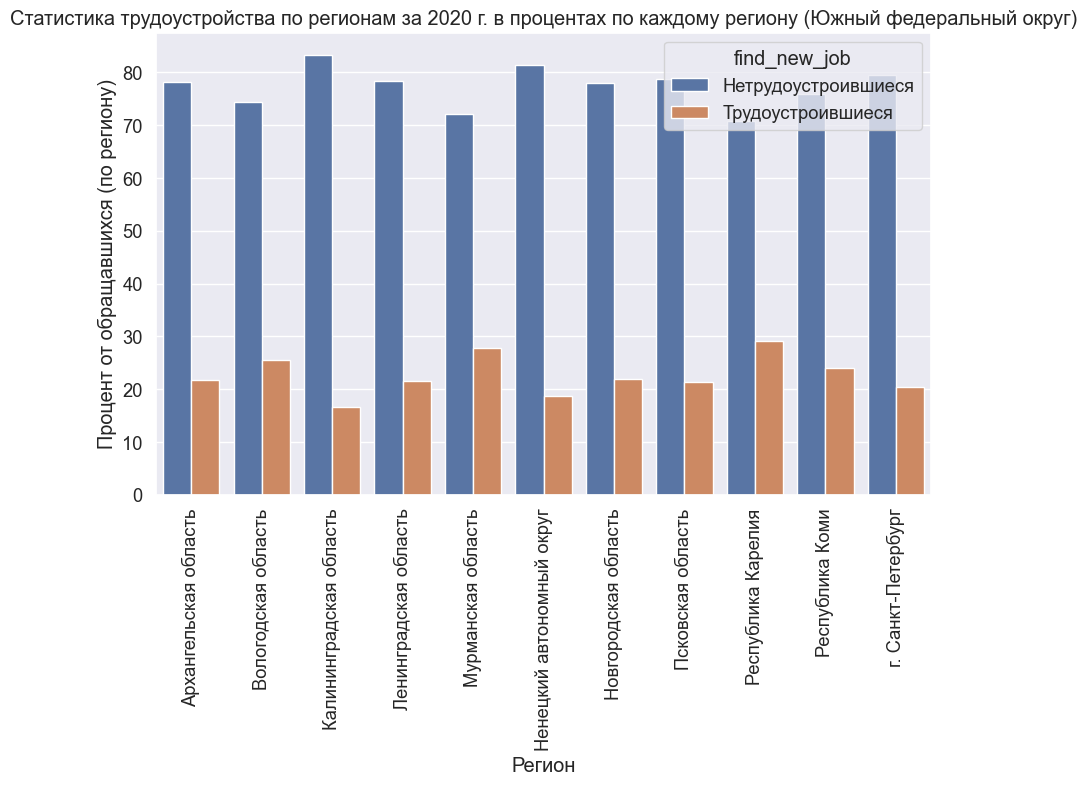

In [118]:
sns.barplot(data=employed_unemployed_in_this_district_by_regions_2020, x='region', y='perc', hue='find_new_job').set(title=f'Статистика трудоустройства по регионам за 2020 г. в процентах по каждому региону ({element})',
                                                                                   xlabel='Регион',
                                                                                   ylabel='Процент от обращавшихся (по региону)')
plt.xticks(rotation=90)
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
- Абсолютно во всех регионах каждого федерального округа число нетрудоустроившихся превышает число трудоустроившихся.<br>
- Наибольший дисбаланс наблюдался в республике Ингушетия Северо-Кавказского федерального округа (нетрудоустроившихся - 99,92%, а трудоустроившихся - всего 0,08%).<br>
- Наименьший дисбаланс наблюдался в Пензенской области Приволжского федерального округа (нетрудоустроившихся - 55,75%, а трудоустроившихся - 44,25%) и в Белгородской области Центрального федерального округа (нетрудоустроившихся - 55,05%, а трудоустроившихся - 44,93%).